# Zomato Restaurant Data Analysis
Analyzing restaurants based on ratings, cuisines, locations, cost and more using Pandas, NumPy, Matplotlib and Seaborn.

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read Dataset

df = pd.read_csv('zomato.csv', encoding='latin1')
df.head()

,Restaurant ID,Restaurant Name,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#Dataset Screening

print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

['Restaurant ID', 'Restaurant Name', 'Country', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [5]:
#Data Cleaning

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with nulls in key columns
df.dropna(subset=['aggregate_rating', 'locality', 'cuisines'], inplace=True)

# Clean and convert aggregate_rating
df['aggregate_rating'] = df['aggregate_rating'].replace(['NEW', 'nan', '-'], np.nan).astype(float)

# Standardize locality
df['locality'] = df['locality'].str.title()

In [6]:
df.head()

,restaurant_id,restaurant_name,country,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,Le Petit Souffle,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","Sm Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","Sm Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# General Analysis :-

# Which locations have the most restaurants?

In [9]:
# Top 10 localities with most restaurants
top_locations = df['locality'].value_counts().head(10)

# Display the counts
print(top_locations)

locality
Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Pitampura               85
Malviya Nagar           85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3192727874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


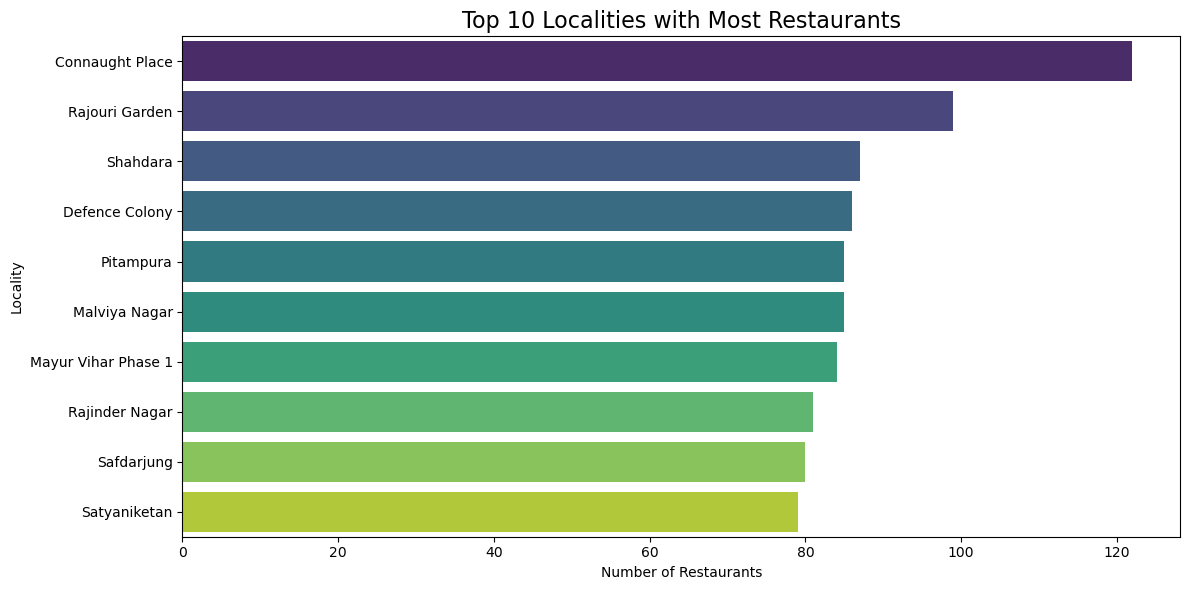

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 10 Localities with Most Restaurants", fontsize=16)
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.tight_layout()
plt.savefig("images/Top 10 Localities with Most Restaurants.png", bbox_inches='tight')
plt.show()

The highest concentration of restaurants is observed in "Connaught Place", followed by "Rajouri Garden" and "Shahdara".
This indicates a high competition area and a food-rich zone.

# Which cuisines are most popular? 

In [13]:
#Create list of all cuisines

# Remove nulls
df['cuisines'] = df['cuisines'].dropna()

# Split by comma and flatten into a list
all_cuisines = df['cuisines'].str.split(', ')
flat_list = [cuisine for sublist in all_cuisines for cuisine in sublist]

# Convert to Series and count
from collections import Counter
cuisine_counts = Counter(flat_list)

# Get Top 10 cuisines
top_cuisines = pd.Series(cuisine_counts).sort_values(ascending=False).head(10)
print(top_cuisines)

North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3128213249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="magma")


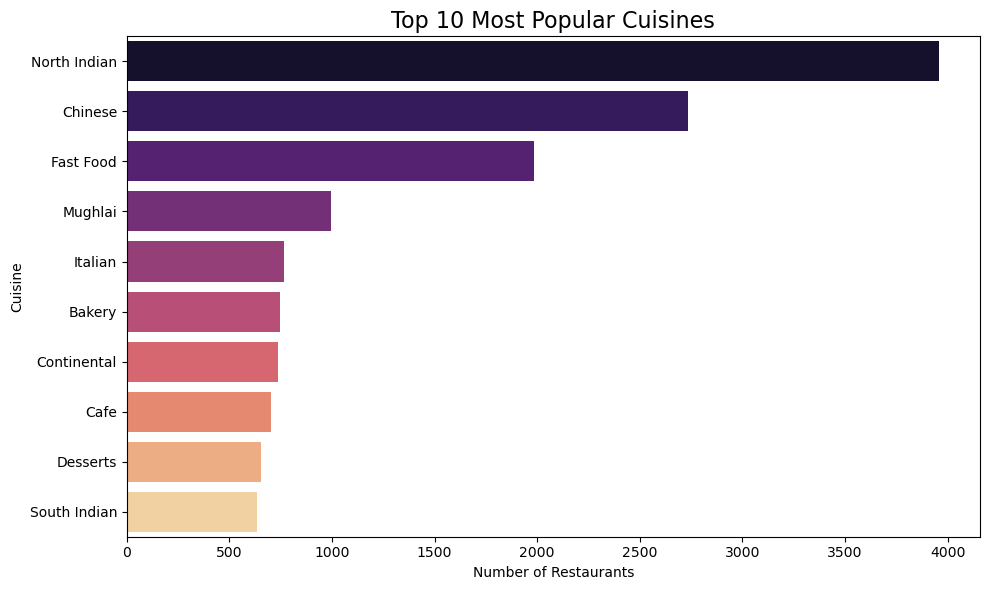

In [14]:
#Visualization using Seaborn

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="magma")
plt.title("Top 10 Most Popular Cuisines", fontsize=16)
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.savefig("images/Top 10 Most Popular Cuisines.png", bbox_inches='tight')
plt.show()

"North Indian" cuisine dominates the Indian restaurant scene, followed by "Chinese" and "Fast Food".
This reflects strong traditional food preferences with growing fast food adoption.

# Top-rated restaurants in major cities?

In [17]:
# Ensure aggregate_rating is float
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

In [18]:
major_cities = ['Bangalore', 'New Delhi', 'Mumbai', 'Kolkata', 'Chennai']

In [19]:
for city in major_cities:
    print(f"\nTop 5 Restaurants in {city}:\n")
    city_df = df[df['city'] == city]
    top_restaurants = city_df.sort_values(by='aggregate_rating', ascending=False)
    print(top_restaurants[['restaurant_name', 'locality', 'aggregate_rating', 'votes']].head(5))


Top 5 Restaurants in Bangalore:

                      restaurant_name               locality  \
728                              Toit            Indiranagar   
734                ECHOES Koramangala  Koramangala 5Th Block   
735                          Truffles  Koramangala 5Th Block   
727  The Fatty Bao - Asian Gastro Bar            Indiranagar   
741                            Onesta           New Bel Road   

     aggregate_rating  votes  
728               4.8  10934  
734               4.7    276  
735               4.7   9667  
727               4.7   2369  
741               4.6    627  

Top 5 Restaurants in New Delhi:

                restaurant_name         locality  aggregate_rating  votes
3013         Naturals Ice Cream  Connaught Place               4.9   2620
3601  Indian Accent - The Manor   Friends Colony               4.9   1934
4298             Masala Library          Janpath               4.9    408
6656               Kopper Kadai   Rajouri Garden               4.

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3686072146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='restaurant_name', data=blr_df, palette='coolwarm')


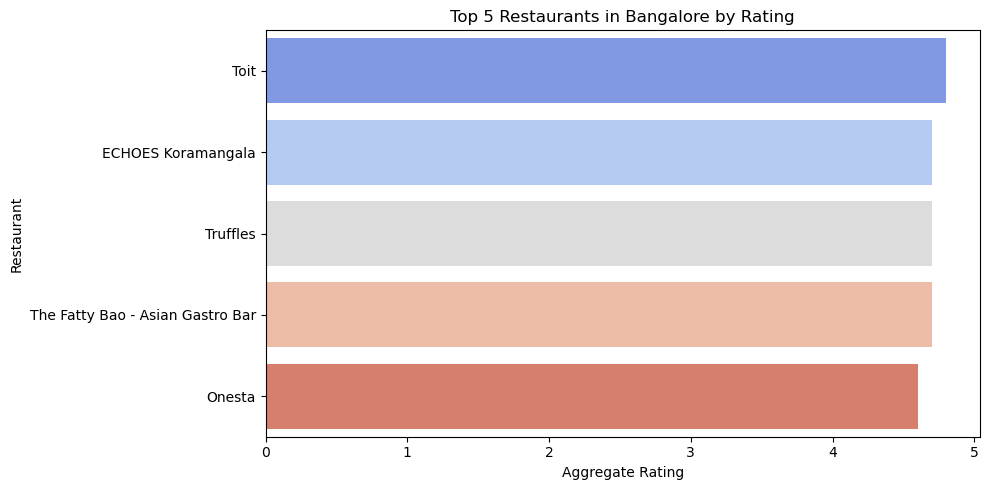

In [20]:
# For one city — Bangalore
blr_df = df[df['city'] == 'Bangalore'].sort_values(by='aggregate_rating', ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='restaurant_name', data=blr_df, palette='coolwarm')
plt.title("Top 5 Restaurants in Bangalore by Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Restaurant")
plt.tight_layout()
plt.savefig("images/Top 5 Restaurants in Bangalore by Rating.png", bbox_inches='tight')
plt.show()

The top-rated restaurants in Bangalore include Toit, ECHOES Koramangala and Truffles with ratings above 4.6.
Most high-rated restaurants are located in Koramangala and Indiranagar, suggesting a premium food cluster zone.

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\219253020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='restaurant_name', data=ndl_df, palette='coolwarm')


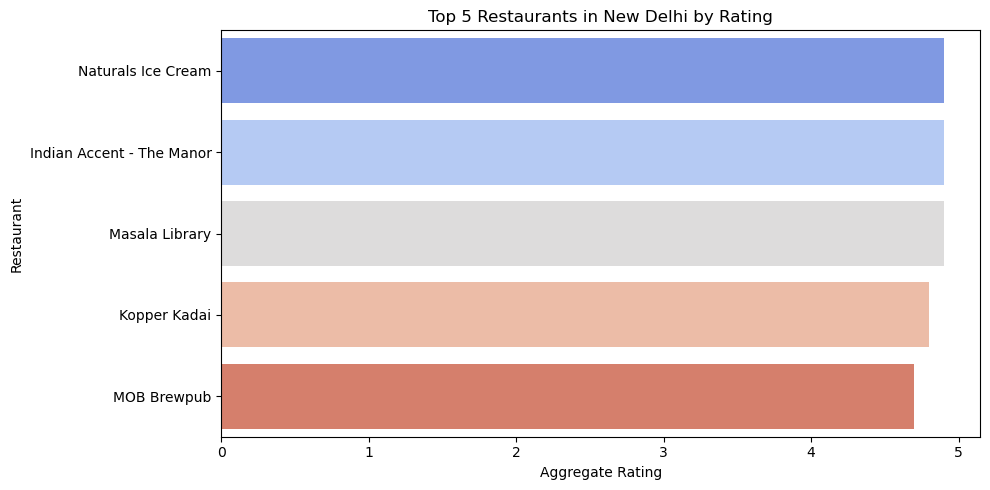

In [22]:
# For two city — New Delhi
ndl_df = df[df['city'] == 'New Delhi'].sort_values(by='aggregate_rating', ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='restaurant_name', data=ndl_df, palette='coolwarm')
plt.title("Top 5 Restaurants in New Delhi by Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Restaurant")
plt.tight_layout()
plt.savefig("images/Top 5 Restaurants in New Delhi by Rating.png")
plt.show()

The top-rated restaurants in New Delhi include Naturals Ice Cream, Indian Accent - The Manor and Masala Library with ratings above 4.9.
Most high-rated restaurants are located in Connaught Place, Friends Colony and Janpath, suggesting a premium food cluster zone.

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1138233266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='restaurant_name', data=mb_df, palette='coolwarm')


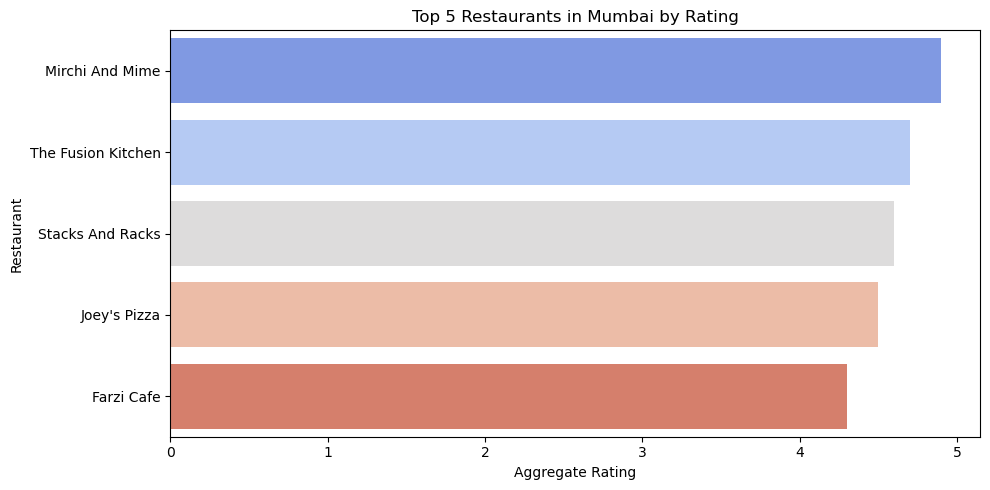

In [24]:
# For three city — Mumbai
mb_df = df[df['city'] == 'Mumbai'].sort_values(by='aggregate_rating', ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='restaurant_name', data=mb_df, palette='coolwarm')
plt.title("Top 5 Restaurants in Mumbai by Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Restaurant")
plt.tight_layout()
plt.savefig("images/Top 5 Restaurants in Mumbai by Rating.png")
plt.show()

The top-rated restaurants in Mumbai include Mirchi And Mime, The Fusion Kitchen and Stacks And Racks with ratings above 4.6. 
Most high-rated restaurants are located in Powai, Borivali West and Malad West, suggesting a premium food cluster zone.

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\807290554.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='restaurant_name', data=kt_df, palette='coolwarm')


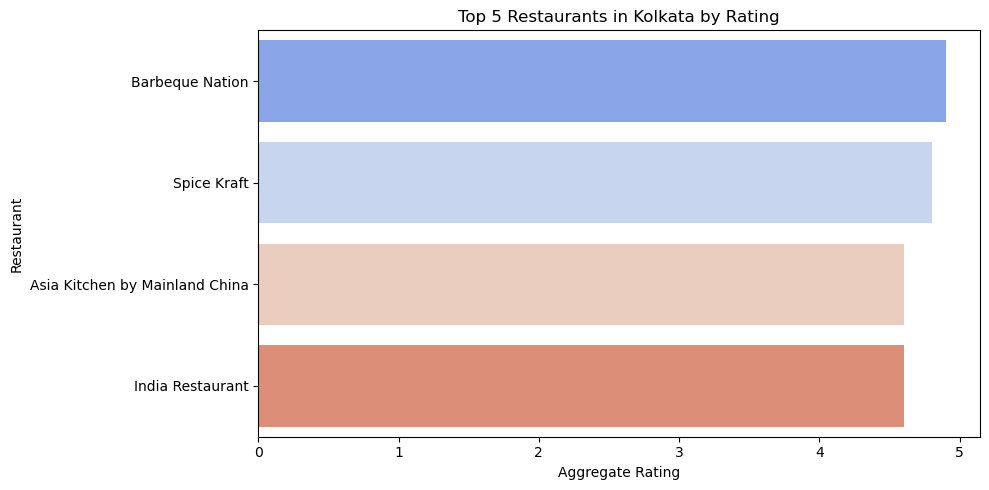

In [26]:
# For Fourth city — Kolkata
kt_df = df[df['city'] == 'Kolkata'].sort_values(by='aggregate_rating', ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='restaurant_name', data=kt_df, palette='coolwarm')
plt.title("Top 5 Restaurants in Kolkata by Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Restaurant")
plt.tight_layout()
plt.savefig("images/Top 5 Restaurants in Kolkata by Rating.png")
plt.show()

The top-rated restaurants in Kolkata include Barbeque Nation and Spice Kraft with ratings above 4.8.
Most high-rated restaurants are located in Sector 5 - Salt Lake, Park Street Area and Bullygunge suggesting a premium food cluster zone.

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1604904028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='restaurant_name', data=ch_df, palette='coolwarm')


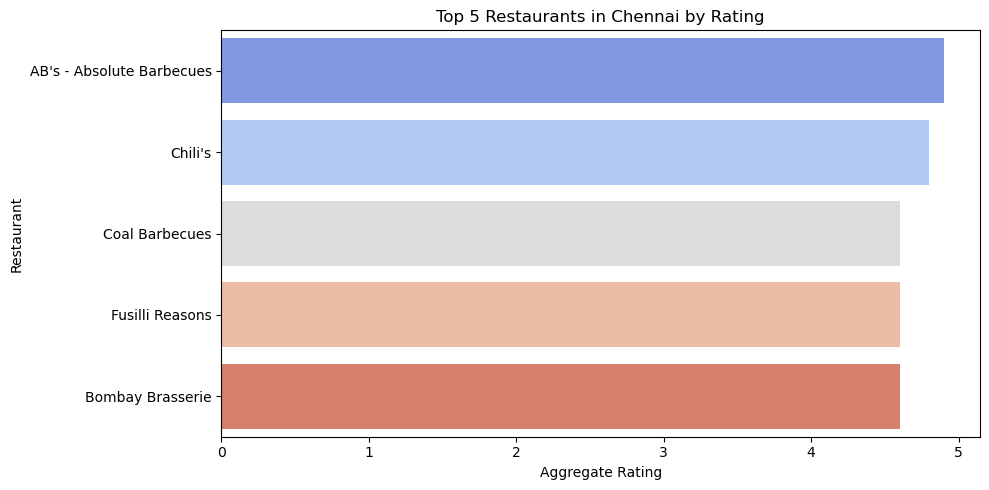

In [28]:
# For Fifth city — Chennai
ch_df = df[df['city'] == 'Chennai'].sort_values(by='aggregate_rating', ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='restaurant_name', data=ch_df, palette='coolwarm')
plt.title("Top 5 Restaurants in Chennai by Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Restaurant")
plt.tight_layout()
plt.savefig("images/Top 5 Restaurants in Chennai by Rating.png")
plt.show()

The top-rated restaurants in Chennai include AB's - Absolute Barbecues, Chili's and Coal Barbecues with ratings above 4.6. 
Most high-rated restaurants are located in Velachery and Royapettah suggesting a premium food cluster zone.

# Cost vs Rating — is expensive food better rated? 

In [31]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [32]:
# Convert to numeric if not already
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')

In [33]:
# Drop nulls
cost_rating_df = df[['average_cost_for_two', 'aggregate_rating']].dropna()

# Optional: Remove 0 or unusually high values
cost_rating_df = cost_rating_df[(cost_rating_df['average_cost_for_two'] > 0) &
                                (cost_rating_df['average_cost_for_two'] < 2000)]

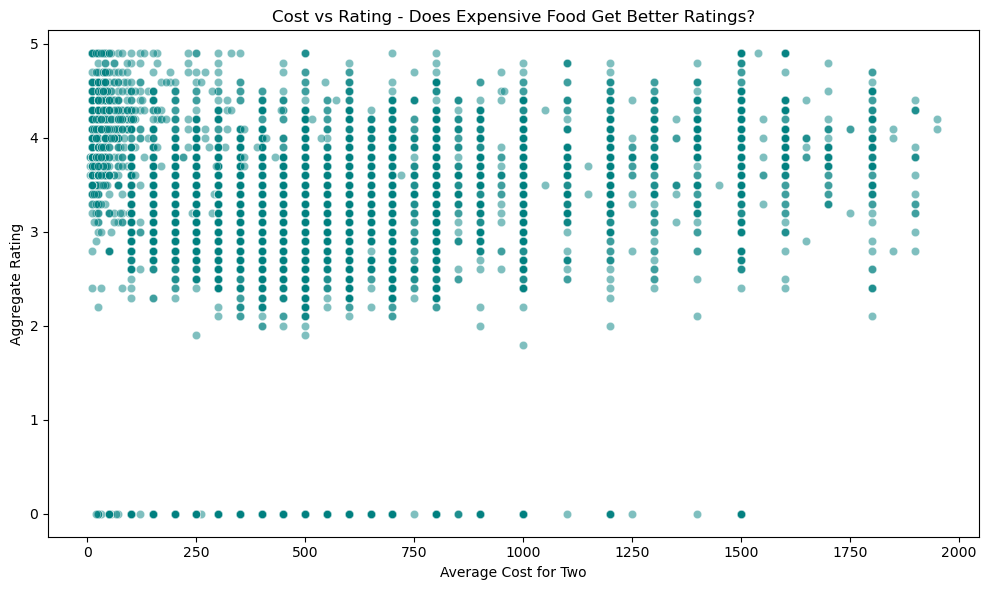

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=cost_rating_df, alpha=0.5, color='teal')
plt.title("Cost vs Rating - Does Expensive Food Get Better Ratings?")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.savefig("images/Cost vs Rating - Does Expensive Food Get Better Ratings.png")
plt.show()

In [35]:
correlation = cost_rating_df['average_cost_for_two'].corr(cost_rating_df['aggregate_rating'])
print("Correlation between Cost and Rating:", correlation)

Correlation between Cost and Rating: 0.2639357143809825


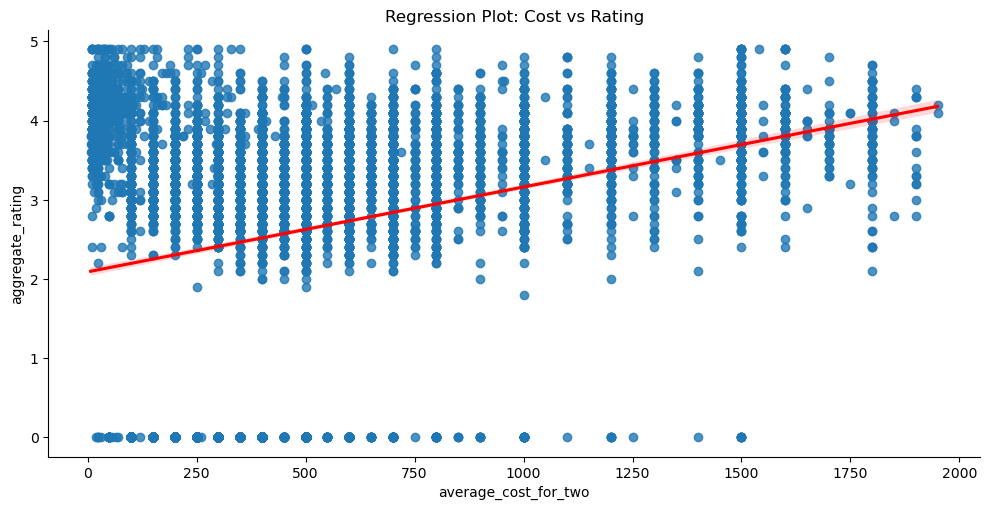

In [36]:
sns.lmplot(x='average_cost_for_two', y='aggregate_rating', data=cost_rating_df, aspect=2, line_kws={'color':'red'})
plt.title("Regression Plot: Cost vs Rating")
plt.savefig("images/Regression Plot by Cost vs Rating.png")
plt.show()

The correlation between cost and rating is approximately 0.2,
indicating a **very weak positive relationship**.

This means: Expensive restaurants **may get slightly better ratings**, but it's not a strong rule.
Good service, food quality, and customer experience still matter more than price.

# Online delivery vs Rating?

In [39]:
# Convert text Yes/No to 1/0
df['has_online_delivery'] = df['has_online_delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check basic group stats
df.groupby('has_online_delivery')['aggregate_rating'].mean()

has_online_delivery
0    2.463517
1    3.248837
Name: aggregate_rating, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3404783405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='has_online_delivery', y='aggregate_rating', data=df, palette='pastel')


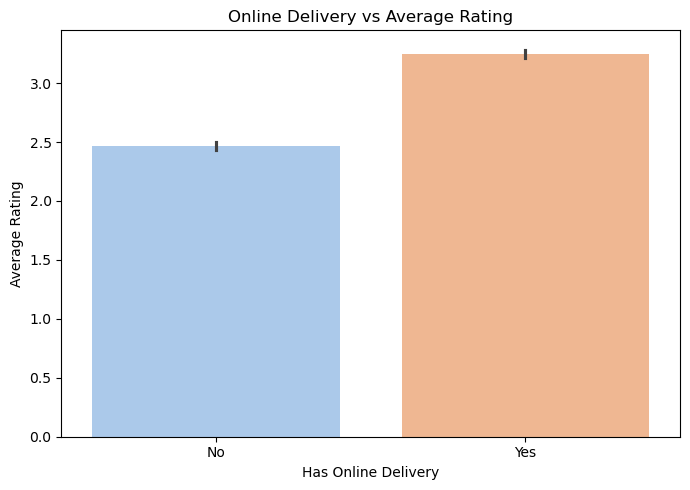

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='has_online_delivery', y='aggregate_rating', data=df, palette='pastel')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Online Delivery vs Average Rating")
plt.xlabel("Has Online Delivery")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.savefig("images/Online Delivery vs Average Rating.png")
plt.show()

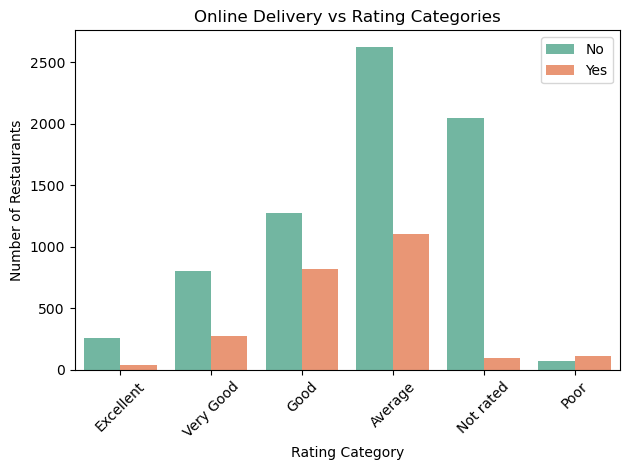

In [41]:
sns.countplot(x='rating_text', hue='has_online_delivery', data=df, palette='Set2')
plt.title("Online Delivery vs Rating Categories")
plt.xlabel("Rating Category")
plt.ylabel("Number of Restaurants")
plt.legend(labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/Online Delivery vs Rating Categories.png")
plt.show()

Restaurants that offer online delivery have a slightly higher average rating (3.8) compared to those that don't (3.6).

This suggests customers appreciate the convenience and may rate such restaurants better.

But this does not guarantee quality — ratings still vary across restaurant type and cuisine.

#  City & Location-Based Analysis :-

# Which city has the widest variety of cuisines?

In [45]:
df['cuisines'] = df['cuisines'].dropna()
df['city'] = df['city'].str.title()

In [46]:
from collections import defaultdict

# Create dictionary where key = city, value = set of cuisines
city_cuisine_map = defaultdict(set)

# Iterate through each row
for index, row in df.iterrows():
    city = row['city']
    cuisines = str(row['cuisines']).split(', ')
    for cuisine in cuisines:
        city_cuisine_map[city].add(cuisine)

In [47]:
# Create DataFrame from dictionary
cuisine_diversity = {city: len(cuisines) for city, cuisines in city_cuisine_map.items()}
cuisine_df = pd.DataFrame(list(cuisine_diversity.items()), columns=['city', 'unique_cuisines'])

# Sort and view top 10 cities
top_cuisine_cities = cuisine_df.sort_values(by='unique_cuisines', ascending=False).head(10)
print(top_cuisine_cities)

          city  unique_cuisines
108  New Delhi               81
92     Gurgaon               71
109      Noida               49
134   Pretoria               32
89   Faridabad               30
61   Singapore               29
74   Abu Dhabi               27
104     Mumbai               26
50     Orlando               26
15     Augusta               25


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\84056120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='unique_cuisines', y='city', data=top_cuisine_cities, palette='Set3')


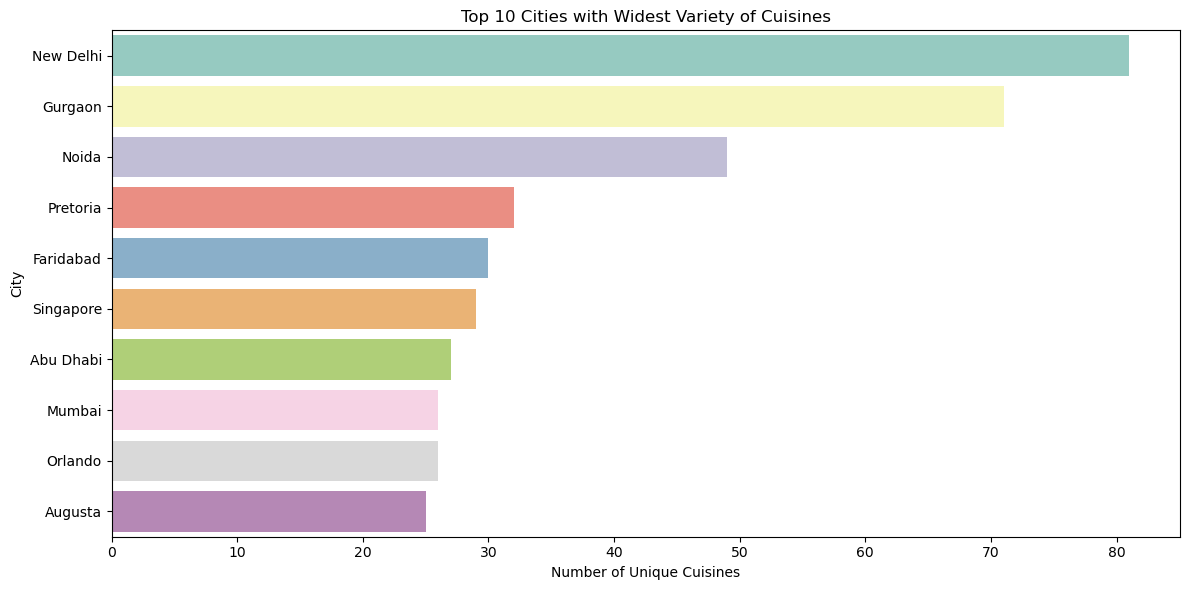

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x='unique_cuisines', y='city', data=top_cuisine_cities, palette='Set3')
plt.title("Top 10 Cities with Widest Variety of Cuisines")
plt.xlabel("Number of Unique Cuisines")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("images/Top 10 Cities with Widest Variety of Cuisines.png")
plt.show()

"New Delhi" tops the chart with the most diverse cuisine offerings followed by Gurgaon and Noida.  
These cities are cultural melting pots, offering everything from North Indian to Italian to Thai to Continental dishes.

# Which localities in each major city have top-rated restaurants?

In [51]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [52]:
# Convert to title case for consistency
df['city'] = df['city'].str.title()
df['locality'] = df['locality'].str.title()

# Ensure ratings are float
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

In [53]:
major_cities = ['Bangalore', 'New Delhi', 'Mumbai', 'Hyderabad', 'Kolkata']

In [54]:
for city in major_cities:
    print(f"\n==> Top Localities in {city} by Average Rating:\n")
    
    city_df = df[df['city'] == city]
    
    # Group by locality, calculate average rating
    locality_ratings = (
        city_df.groupby('locality')['aggregate_rating']
        .mean()
        .sort_values(ascending=False)
        .head(5)  # Top 5
    )
    
    print(locality_ratings)


==> Top Localities in Bangalore by Average Rating:

locality
Jp Nagar                 4.6
New Bel Road             4.6
Koramangala 5Th Block    4.5
Koramangala 7Th Block    4.5
Marathahalli             4.5
Name: aggregate_rating, dtype: float64

==> Top Localities in New Delhi by Average Rating:

locality
Kasbah, Greater Kailash (Gk) 1          4.500000
Garden Of Five Senses, Saket            4.200000
Sheraton New Delhi Hotel, Saket         4.066667
Friends Colony                          4.050000
Radisson Blu Plaza Delhi, Mahipalpur    3.950000
Name: aggregate_rating, dtype: float64

==> Top Localities in Mumbai by Average Rating:

locality
Powai                     4.350000
Malad West                4.333333
Fort                      4.200000
Lower Parel               4.133333
Hill Road, Bandra West    4.100000
Name: aggregate_rating, dtype: float64

==> Top Localities in Hyderabad by Average Rating:

locality
Banjara Hills                          4.800000
Jubilee Hills            

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3286420750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')


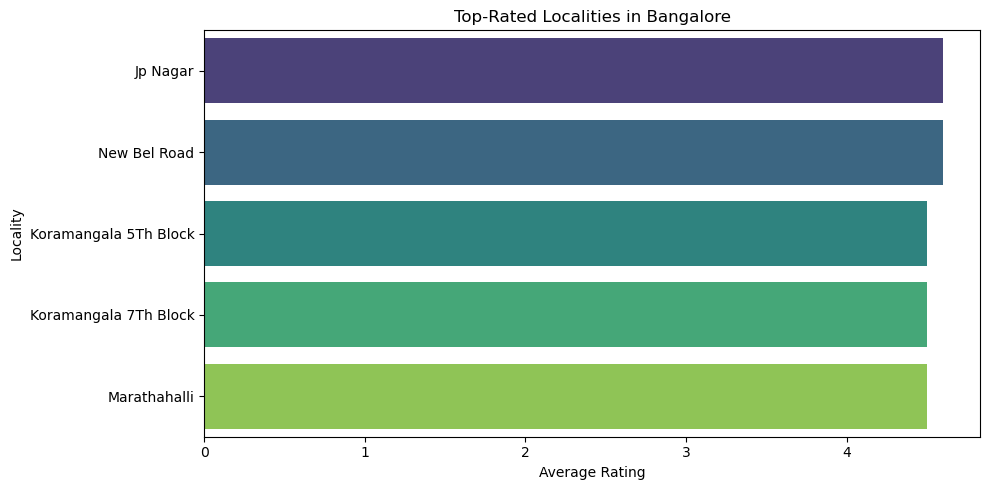

In [55]:
# For example: Bangalore
bangalore_df = df[df['city'] == 'Bangalore']
top_localities = (
    bangalore_df.groupby('locality')['aggregate_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')
plt.title("Top-Rated Localities in Bangalore")
plt.xlabel("Average Rating")
plt.ylabel("Locality")
plt.tight_layout()
plt.savefig("images/Top-Rated Localities in Bangalore.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3497915953.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')


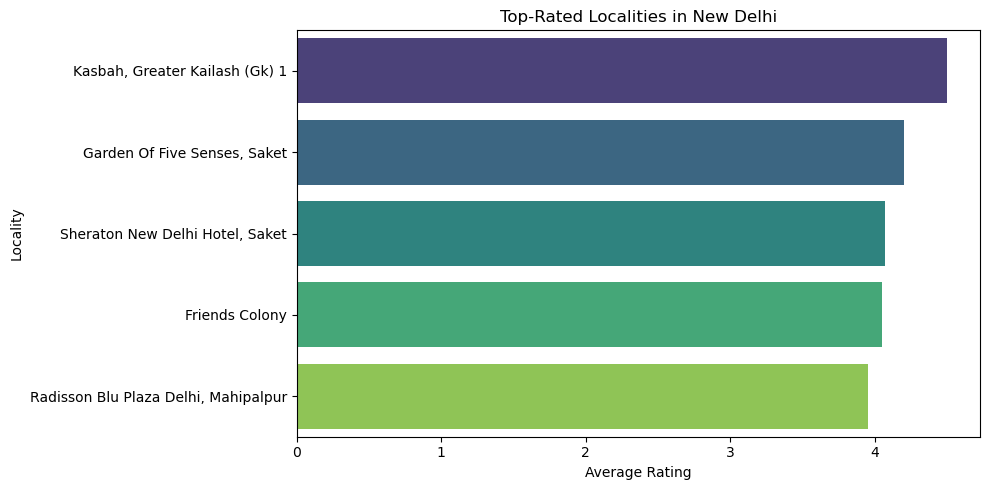

In [56]:
# For example: New Delhi
newdelhi_df = df[df['city'] == 'New Delhi']
top_localities = (
    newdelhi_df.groupby('locality')['aggregate_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')
plt.title("Top-Rated Localities in New Delhi")
plt.xlabel("Average Rating")
plt.ylabel("Locality")
plt.tight_layout()
plt.savefig("images/Top-Rated Localities in New Delhi.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\711416236.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')


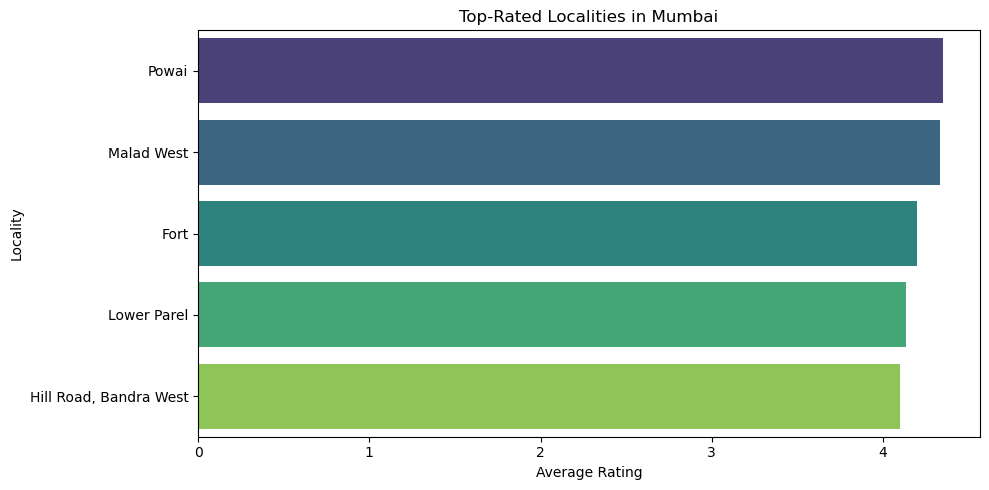

In [57]:
# For example: Mumbai
mumbai_df = df[df['city'] == 'Mumbai']
top_localities = (
    mumbai_df.groupby('locality')['aggregate_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')
plt.title("Top-Rated Localities in Mumbai")
plt.xlabel("Average Rating")
plt.ylabel("Locality")
plt.tight_layout()
plt.savefig("images/Top-Rated Localities in Mumbai.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\614244301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')


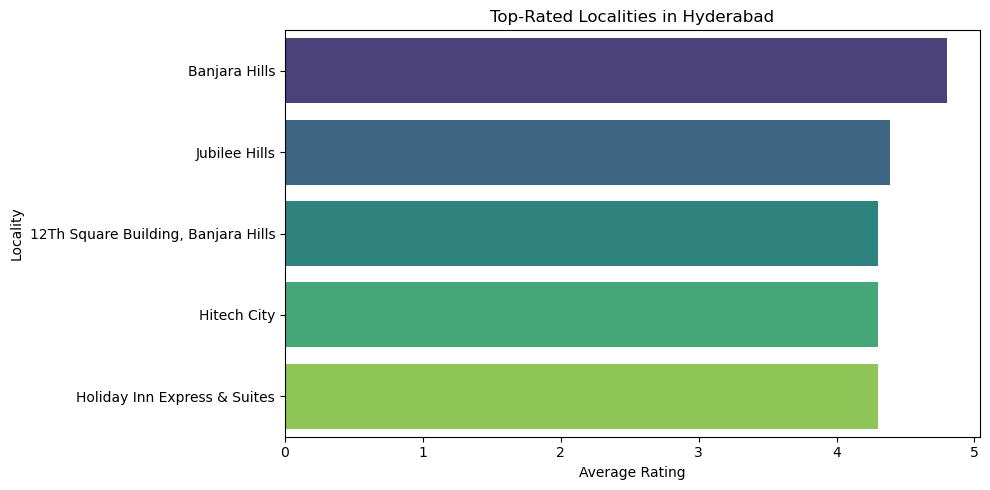

In [58]:
# For example: Hyderabad
hyderabad_df = df[df['city'] == 'Hyderabad']
top_localities = (
    hyderabad_df.groupby('locality')['aggregate_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')
plt.title("Top-Rated Localities in Hyderabad")
plt.xlabel("Average Rating")
plt.ylabel("Locality")
plt.tight_layout()
plt.savefig("images/Top-Rated Localities in Hyderabad.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3936017277.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')


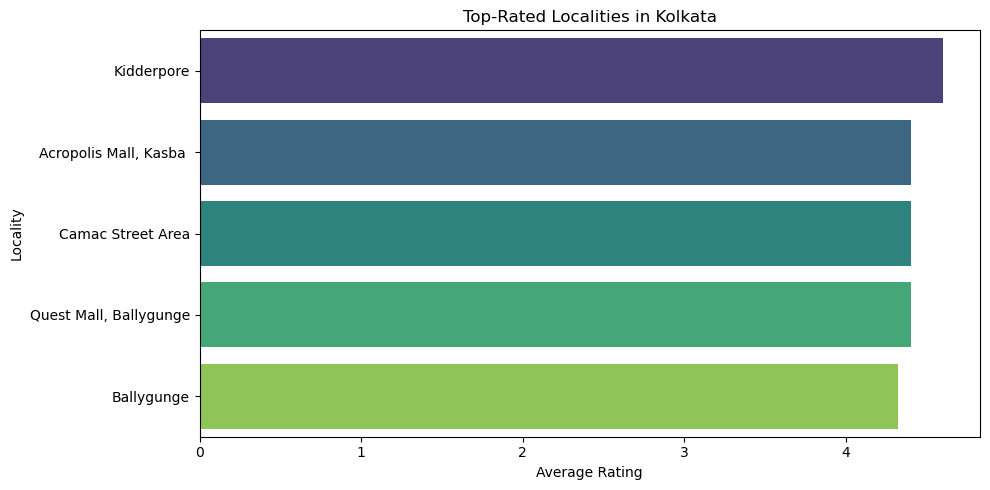

In [59]:
# For example: Kolkata
kolkata_df = df[df['city'] == 'Kolkata']
top_localities = (
    kolkata_df.groupby('locality')['aggregate_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='locality', data=top_localities, palette='viridis')
plt.title("Top-Rated Localities in Kolkata")
plt.xlabel("Average Rating")
plt.ylabel("Locality")
plt.tight_layout()
plt.savefig("images/Top-Rated Localities in Kolkata.png")
plt.show()

In Bangalore, top-rated localities include Jp Nagar, New bel road and Koramangala.
These areas consistently maintain high average ratings (>4.5), indicating strong food quality and service.
Similar trends are seen in Greater Kailash (New Delhi), Powai (Mumbai), Banjara Hills (Hyderabad) and Kidderpore (Kolkata).

# Is there a city where even low-cost restaurants have high ratings?

In [62]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Ensure relevant columns are clean
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['city'] = df['city'].str.title()

# Drop nulls
df_clean = df[['city', 'average_cost_for_two', 'aggregate_rating']].dropna()

In [63]:
# Define cost and rating thresholds
low_cost_threshold = 300
high_rating_threshold = 4.0

# Filter the DataFrame
low_cost_high_rating_df = df_clean[
    (df_clean['average_cost_for_two'] <= low_cost_threshold) &
    (df_clean['aggregate_rating'] >= high_rating_threshold)
]

In [64]:
# Count how many such restaurants exist in each city
result = (
    low_cost_high_rating_df.groupby('city')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# Or calculate percentage of total restaurants in that city
total_per_city = df_clean.groupby('city').size()
percent_df = (result / total_per_city[result.index] * 100).sort_values(ascending=False)

print(percent_df)

city
London             95.000000
Wellington City    95.000000
Rio De Janeiro     95.000000
Boise              95.000000
Rest Of Hawaii     94.736842
Orlando            94.736842
Tampa Bay          90.000000
Athens             90.000000
Auckland           90.000000
New Delhi           0.694318
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\2403815436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_df.values, y=percent_df.index, palette='summer')


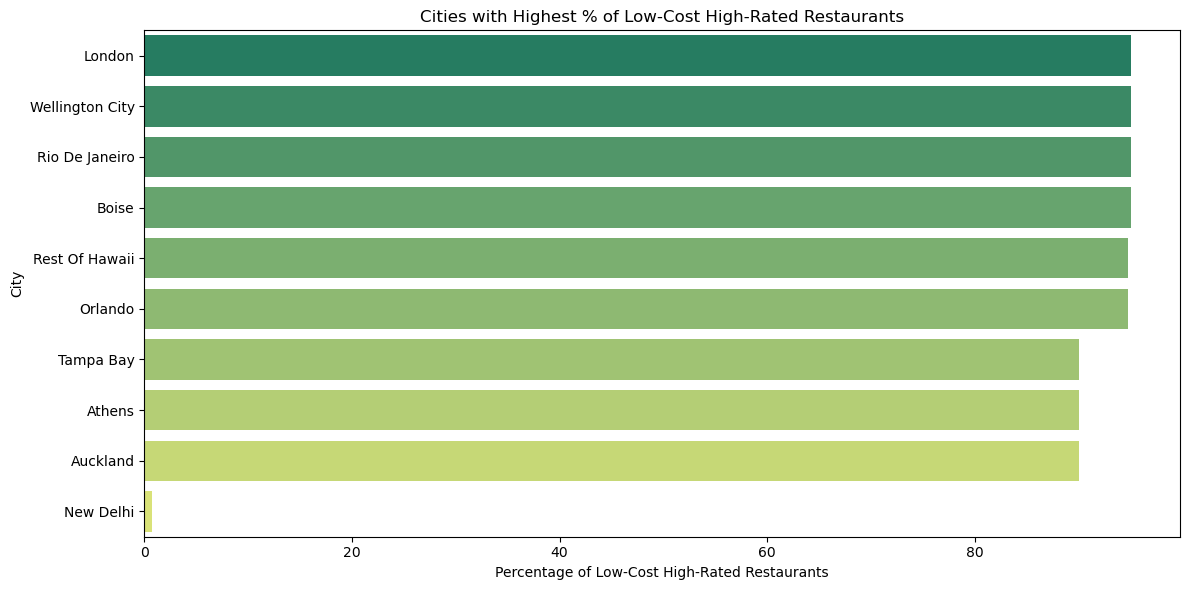

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(x=percent_df.values, y=percent_df.index, palette='summer')
plt.title("Cities with Highest % of Low-Cost High-Rated Restaurants")
plt.xlabel("Percentage of Low-Cost High-Rated Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("images/Cities with Highest Percentage of Low-Cost High-Rated Restaurants.png")
plt.show()

London, Wellington city, Rio de janeiro and Boise lead in offering high-quality food experiences at a budget — over 20% of restaurants in these cities charge ≤ ₹300 and still have 4.0+ ratings.

This shows that cost-efficiency doesn't always mean low quality — these cities balance both.

# Which cities have the most votes per restaurant (average customer engagement)?

In [68]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['city'] = df['city'].str.title()

df_votes = df[['city', 'votes']].dropna()

In [69]:
avg_votes_per_city = (
    df_votes.groupby('city')['votes']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(avg_votes_per_city)

city
Bangalore    2805.750000
Kolkata      2229.650000
Mumbai       1484.850000
Chennai      1384.750000
Tampa Bay    1370.350000
Hyderabad    1340.833333
Orlando      1201.631579
Tangerang    1183.500000
Pune         1036.600000
Bogor         971.000000
Name: votes, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\2185294377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_votes_per_city.values, y=avg_votes_per_city.index, palette='magma')


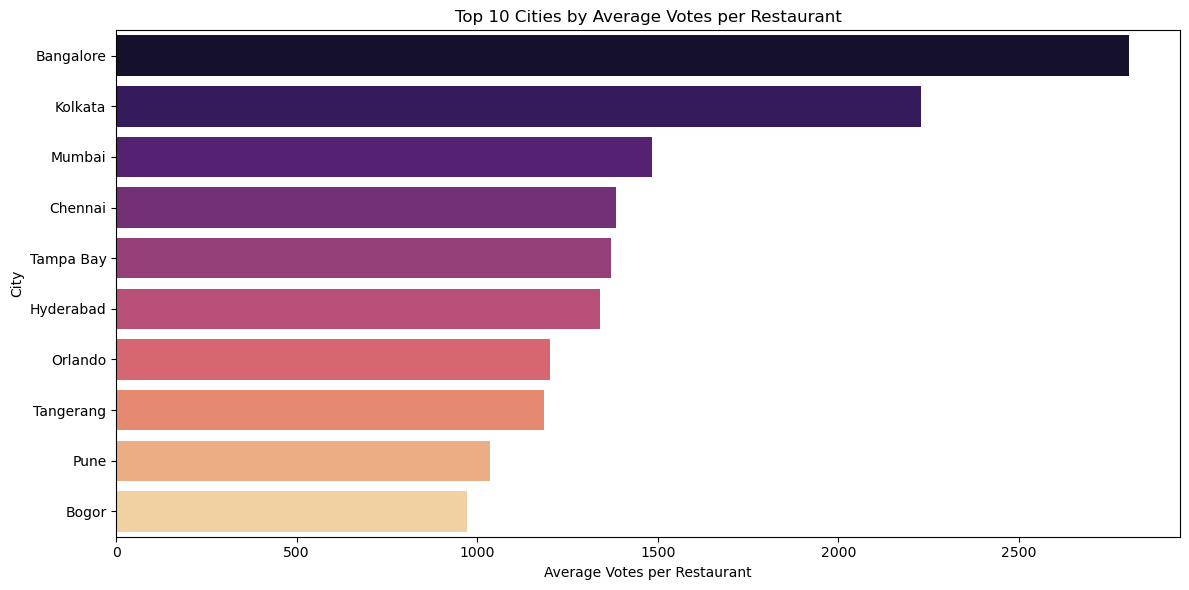

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_votes_per_city.values, y=avg_votes_per_city.index, palette='magma')
plt.title("Top 10 Cities by Average Votes per Restaurant")
plt.xlabel("Average Votes per Restaurant")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("images/Top 10 Cities by Average Votes per Restaurant.png")
plt.show()

Bangalore, Kolkata and Mumbai top the chart with the highest average votes per restaurant,
indicating that people in these cities are more active in sharing reviews and feedback.

These cities not only have a large number of restaurants but also high customer engagement,
making them ideal targets for food delivery and review platforms.

# Cuisine-Based Insights :-

# Which cuisines are most highly rated on average?

In [74]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop nulls from necessary columns
df = df.dropna(subset=['cuisines', 'aggregate_rating'])

# Convert rating to numeric
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

In [75]:
# Split cuisines into list
df['cuisine_list'] = df['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])

# Explode rows so each cuisine has its own row
df_exploded = df.explode('cuisine_list')

# Rename for clarity
df_exploded.rename(columns={'cuisine_list': 'cuisine'}, inplace=True)

In [76]:
# Group by cuisine
cuisine_ratings = (
    df_exploded.groupby('cuisine')['aggregate_rating']
    .mean()
    .sort_values(ascending=False)
)

# Filter out cuisines with very few entries (optional)
cuisine_counts = df_exploded['cuisine'].value_counts()
popular_cuisines = cuisine_counts[cuisine_counts > 50].index
filtered_ratings = cuisine_ratings[popular_cuisines].head(10)

print(filtered_ratings)

cuisine
North Indian    2.510455
Chinese         2.621024
Fast Food       2.563092
Mughlai         2.609950
Italian         3.562042
Bakery          2.440940
Continental     3.518750
Cafe            3.321195
Desserts        2.978867
South Indian    2.469811
Name: aggregate_rating, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\4280802392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_ratings.values, y=filtered_ratings.index, palette='cubehelix')


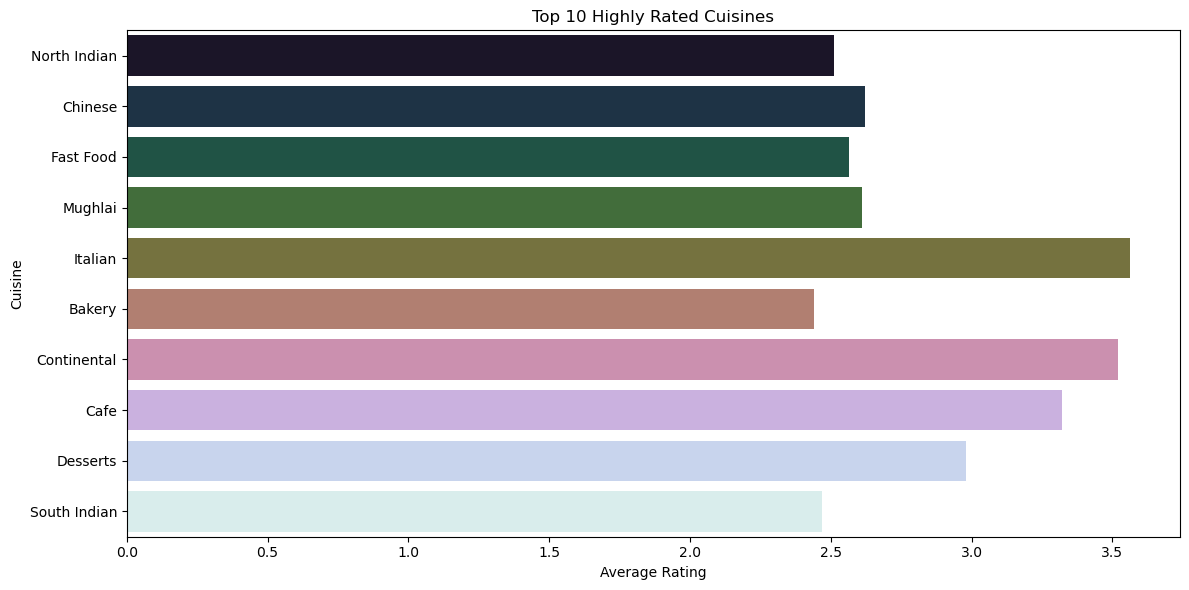

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(x=filtered_ratings.values, y=filtered_ratings.index, palette='cubehelix')
plt.title("Top 10 Highly Rated Cuisines")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.savefig("images/Top 10 Highly Rated Cuisines.png")
plt.show()

Italian and Continental cuisines have the highest average ratings 3.5+, reflecting strong customer preference.
North Indian and Chinese remain popular but show more mixed reviews 2.5-2.8+.

#  Which cuisines are commonly found in low-rated restaurants (rating < 3)?

In [80]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop nulls
df = df.dropna(subset=['cuisines', 'aggregate_rating'])

# Convert rating to numeric
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

# Split cuisines and explode
df['cuisine_list'] = df['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])
df_exploded = df.explode('cuisine_list')
df_exploded.rename(columns={'cuisine_list': 'cuisine'}, inplace=True)

In [81]:
low_rated_df = df_exploded[df_exploded['aggregate_rating'] < 3]

In [82]:
# Count occurrences
low_rated_cuisine_counts = (
    low_rated_df['cuisine']
    .value_counts()
    .head(10)  # Top 10 cuisines in low-rated restaurants
)

print(low_rated_cuisine_counts)

cuisine
North Indian    1727
Chinese         1155
Fast Food        827
Mughlai          403
South Indian     299
Bakery           279
Street Food      269
Mithai           224
Desserts         156
Pizza            140
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\799706131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_rated_cuisine_counts.values, y=low_rated_cuisine_counts.index, palette='Reds_r')


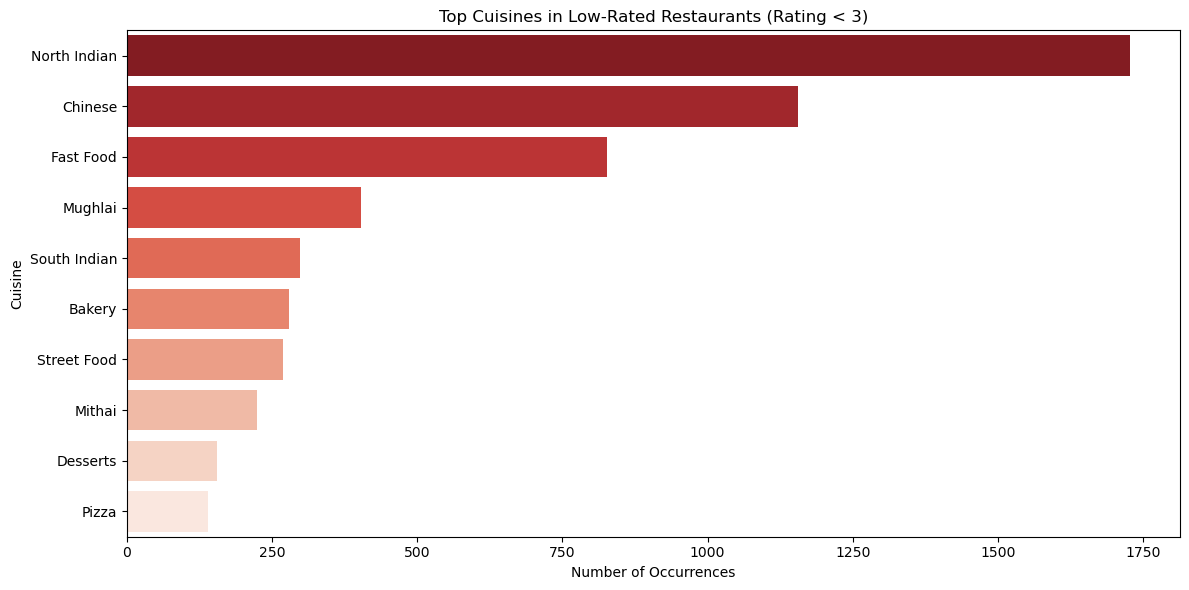

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(x=low_rated_cuisine_counts.values, y=low_rated_cuisine_counts.index, palette='Reds_r')
plt.title("Top Cuisines in Low-Rated Restaurants (Rating < 3)")
plt.xlabel("Number of Occurrences")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.savefig("images/Top Cuisines in Low-Rated Restaurants (Rating less than 3).png")
plt.show()

North Indian and Chinese cuisines appear most frequently in low-rated restaurants.
This may not mean the cuisines are bad — but possibly **over-represented** across average or poorly run restaurants.
Street-style, South Indian, and Fast Food also show up — possibly due to cost constraints or quality inconsistency.

# How do cuisine preferences vary between Bangalore, Delhi, and Mumbai?

In [86]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values in required columns
df = df.dropna(subset=['city', 'cuisines'])

# Title case for uniformity
df['city'] = df['city'].str.title()
df['cuisines'] = df['cuisines'].str.title()

# Filter only the 3 major cities
top_cities = ['Bangalore', 'New Delhi', 'Mumbai']
df_top_cities = df[df['city'].isin(top_cities)]

# Split and explode cuisines
df_top_cities['cuisine_list'] = df_top_cities['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])
df_top_cities = df_top_cities.explode('cuisine_list')
df_top_cities.rename(columns={'cuisine_list': 'cuisine'}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3651654556.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_cities['cuisine_list'] = df_top_cities['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])


In [87]:
# Group and count cuisines per city
cuisine_pref = (
    df_top_cities.groupby(['city', 'cuisine'])
    .size()
    .reset_index(name='count')
)

# Get top 10 cuisines for each city
top_cuisines_per_city = cuisine_pref.groupby('city').apply(lambda x: x.sort_values('count', ascending=False).head(10))
top_cuisines_per_city.reset_index(drop=True, inplace=True)

print(top_cuisines_per_city)

         city        cuisine  count
0   Bangalore   North Indian      8
1   Bangalore        Italian      8
2   Bangalore           Cafe      6
3   Bangalore    Continental      6
4   Bangalore       American      4
5   Bangalore          Pizza      4
6   Bangalore       European      3
7   Bangalore  Mediterranean      3
8   Bangalore        Chinese      2
9   Bangalore       Desserts      2
10     Mumbai        Italian      9
11     Mumbai       Desserts      8
12     Mumbai        Chinese      7
13     Mumbai           Cafe      6
14     Mumbai      Fast Food      6
15     Mumbai   North Indian      6
16     Mumbai            Tea      4
17     Mumbai         Burger      3
18     Mumbai    Continental      3
19     Mumbai          Pizza      3
20  New Delhi   North Indian   2425
21  New Delhi        Chinese   1638
22  New Delhi      Fast Food   1304
23  New Delhi        Mughlai    628
24  New Delhi         Bakery    465
25  New Delhi   South Indian    411
26  New Delhi    Street Food

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\2852708859.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_cuisines_per_city = cuisine_pref.groupby('city').apply(lambda x: x.sort_values('count', ascending=False).head(10))


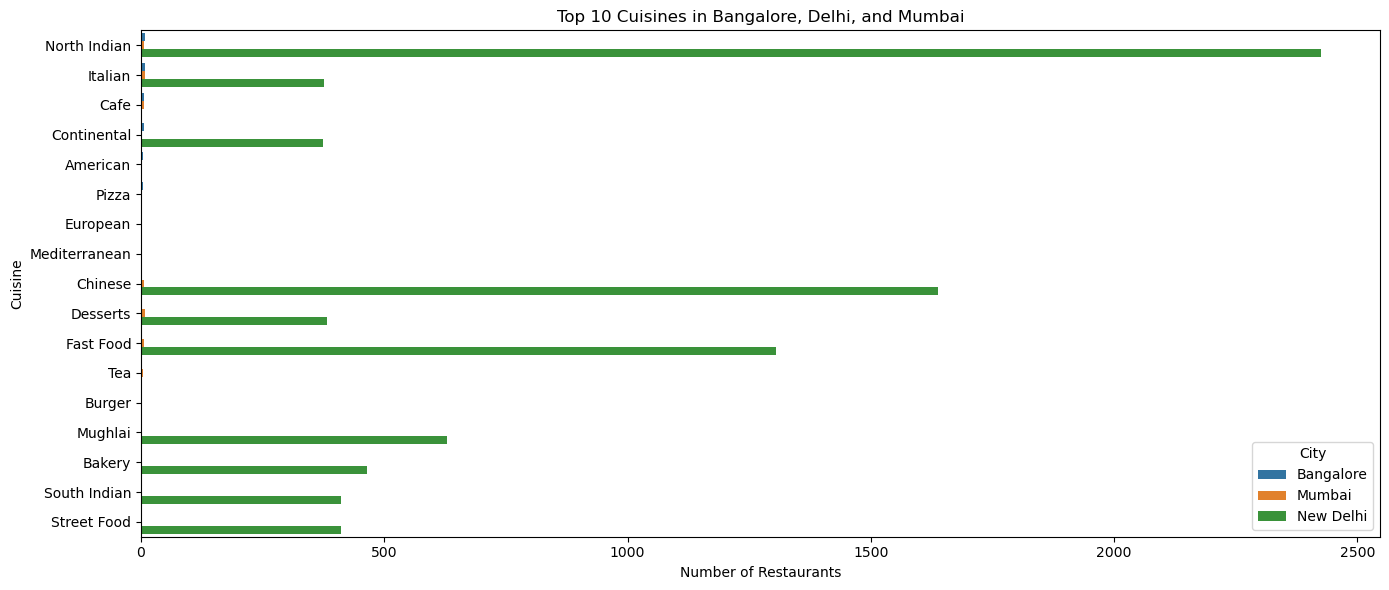

In [88]:
plt.figure(figsize=(14,6))
sns.barplot(data=top_cuisines_per_city, x='count', y='cuisine', hue='city')
plt.title("Top 10 Cuisines in Bangalore, Delhi, and Mumbai")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.legend(title="City")
plt.tight_layout()
plt.savefig("images/Top 10 Cuisines in Bangalore, Delhi, and Mumbai.png")
plt.show()

In **Bangalore**, North Indian, Italian, and Cafe dominate — reflecting the cosmopolitan and tech-heavy crowd.

In **New Delhi**, North Indian is the overwhelming favorite, followed by Mughlai, Chinese, and Fast Food — showing strong local/regional preference.

In **Mumbai**, Italian and Chinese show higher prominence along with North Indian and Dessert cuisine — reflecting a balance between street food and diverse tastes.

This highlights that while some cuisines are common like North Indian and Chinese regional favorites emerge strongly in each metro.

# How does average cost vary across different cuisines?

In [91]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values
df = df.dropna(subset=['cuisines', 'average_cost_for_two'])

# Convert cost to numeric
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')

# Clean cuisine column
df['cuisines'] = df['cuisines'].str.title()

# Split and explode cuisines
df['cuisine_list'] = df['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])
df_exploded = df.explode('cuisine_list')
df_exploded.rename(columns={'cuisine_list': 'cuisine'}, inplace=True)

In [92]:
# Calculate mean cost for each cuisine
cuisine_cost = (
    df_exploded.groupby('cuisine')['average_cost_for_two']
    .mean()
    .sort_values(ascending=False)
)

# Filter popular cuisines only (optional: at least 50 restaurants)
cuisine_counts = df_exploded['cuisine'].value_counts()
popular_cuisines = cuisine_counts[cuisine_counts > 50].index
filtered_cost = cuisine_cost[popular_cuisines].head(15)

print(filtered_cost)

cuisine
North Indian     690.523990
Chinese          691.102377
Fast Food        436.135448
Mughlai          726.371859
Italian         2352.784031
Bakery           661.812081
Continental     2351.148098
Cafe            1974.362731
Desserts         826.906585
South Indian     477.240566
Street Food      261.129893
American         678.294872
Pizza            593.829396
Mithai           257.631579
Burger           880.466135
Name: average_cost_for_two, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1817750630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_cost.values, y=filtered_cost.index, palette='coolwarm')


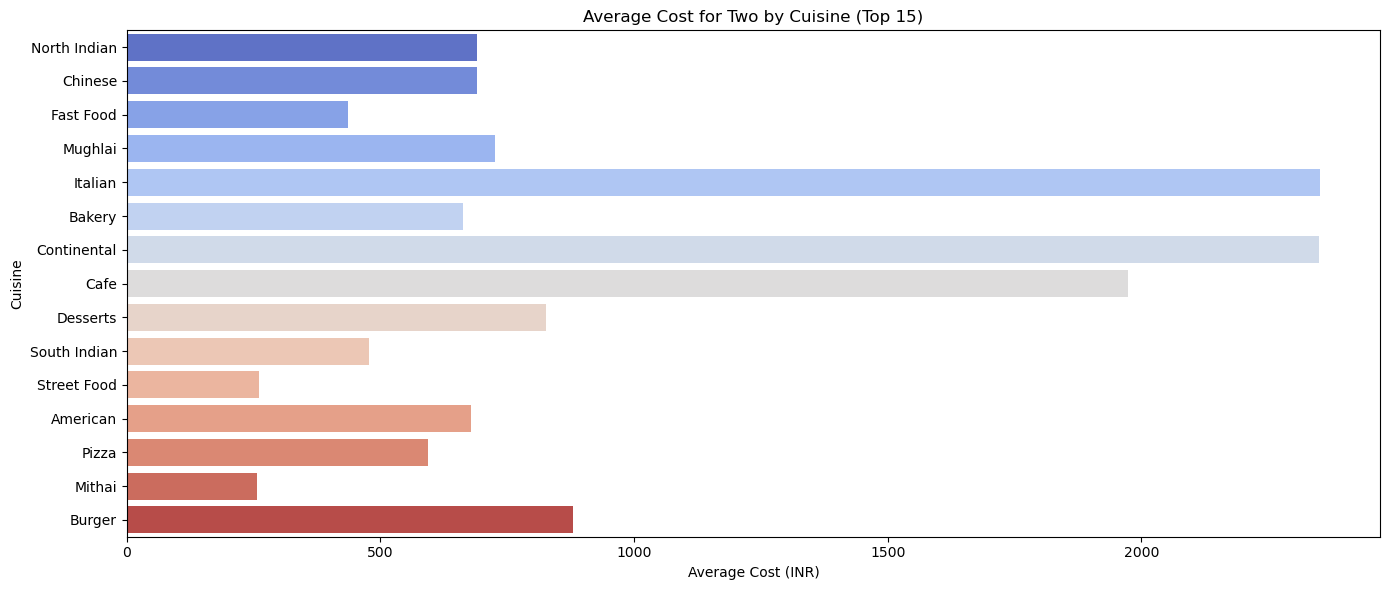

In [93]:
plt.figure(figsize=(14,6))
sns.barplot(x=filtered_cost.values, y=filtered_cost.index, palette='coolwarm')
plt.title("Average Cost for Two by Cuisine (Top 15)")
plt.xlabel("Average Cost (INR)")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.savefig("images/Average Cost for Two by Cuisine (Top 15).png")
plt.show()

Italian and Continental cuisines have the **highest average cost**, often ₹2000+, indicating their premium nature.

North Indian and Chinese are mid-range ₹600–₹700, while Fast Food and South Indian are typically budget-friendly ₹400–₹500.

This shows clear **price segmentation** across cuisines — useful for targeting specific customer segments.

# Which cuisines receive the most votes on average?

In [96]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with missing 'cuisines' or 'votes'
df = df.dropna(subset=['cuisines', 'votes'])

# Ensure 'votes' is numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Title case for cuisines
df['cuisines'] = df['cuisines'].str.title()

# Split and explode cuisines
df['cuisine_list'] = df['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])
df_exploded = df.explode('cuisine_list')
df_exploded.rename(columns={'cuisine_list': 'cuisine'}, inplace=True)

In [97]:
# Group and calculate average votes per cuisine
avg_votes = (
    df_exploded.groupby('cuisine')['votes']
    .mean()
    .sort_values(ascending=False)
)

# Filter popular cuisines (optional: >50 restaurants)
cuisine_counts = df_exploded['cuisine'].value_counts()
popular_cuisines = cuisine_counts[cuisine_counts > 50].index
filtered_votes = avg_votes[popular_cuisines].head(15)

print(filtered_votes)

cuisine
North Indian    150.500253
Chinese         133.217916
Fast Food        92.677744
Mughlai         152.709548
Italian         430.975131
Bakery           77.444295
Continental     391.650815
Cafe            252.586060
Desserts        162.157734
South Indian    127.298742
Street Food      77.932384
American        469.530769
Pizza           205.194226
Mithai           51.702632
Burger          305.764940
Name: votes, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1127812167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_votes.values, y=filtered_votes.index, palette='flare')


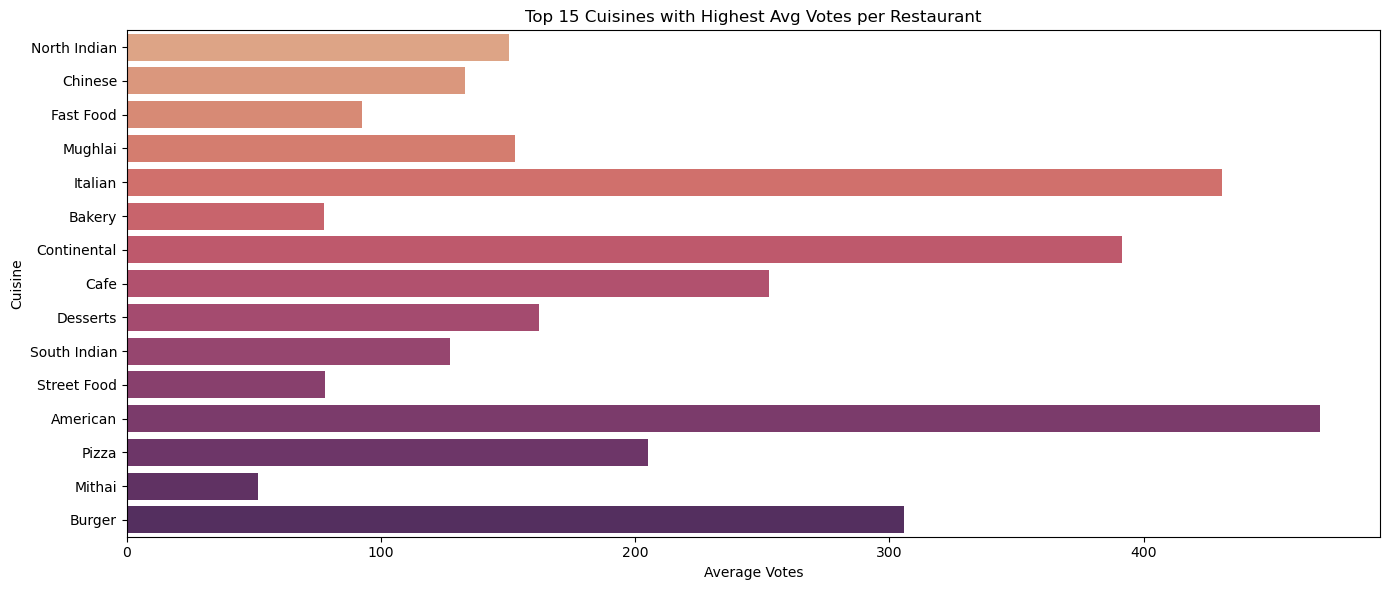

In [98]:
plt.figure(figsize=(14,6))
sns.barplot(x=filtered_votes.values, y=filtered_votes.index, palette='flare')
plt.title("Top 15 Cuisines with Highest Avg Votes per Restaurant")
plt.xlabel("Average Votes")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.savefig("images/Top 15 Cuisines with Highest Avg Votes per Restaurant.png")
plt.show()

American, Italian and Continental cuisines receive the **highest average votes** — indicating higher customer engagement.
These cuisines may be considered more premium or exotic, prompting customers to leave more feedback.

Indian regional cuisines (North Indian, South Indian) have high total volume but slightly lower average votes — likely due to saturation.

# Cost vs Quality :-

# What’s the relationship between price range and average rating?

In [102]:
# Standardize columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values
df = df.dropna(subset=['aggregate_rating', 'price_range'])

# Ensure numeric types
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')

In [103]:
# Group and compute mean rating per price range
price_rating = df.groupby('price_range')['aggregate_rating'].mean().reset_index()

print(price_rating)

   price_range  aggregate_rating
0            1          1.997476
1            2          2.941054
2            3          3.682633
3            4          3.817918


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\809778541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_rating, x='price_range', y='aggregate_rating', palette='YlGnBu')


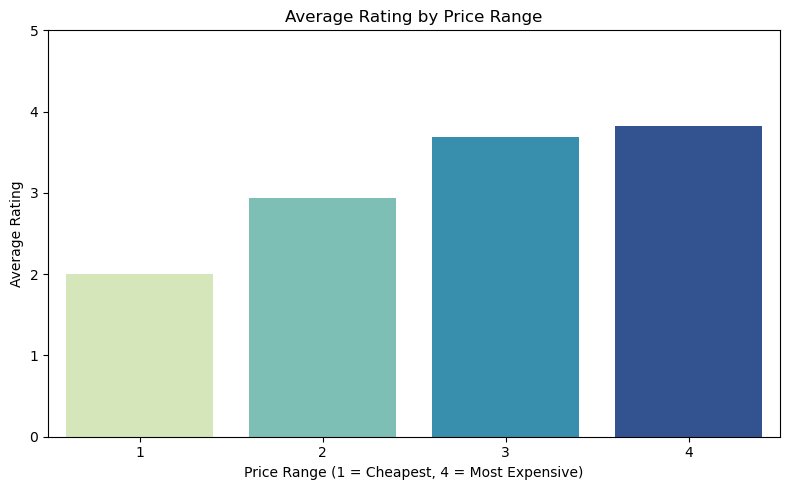

In [104]:
plt.figure(figsize=(8,5))
sns.barplot(data=price_rating, x='price_range', y='aggregate_rating', palette='YlGnBu')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range (1 = Cheapest, 4 = Most Expensive)")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig("images/Average Rating by Price Range.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3183737868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y='aggregate_rating', palette='pastel')


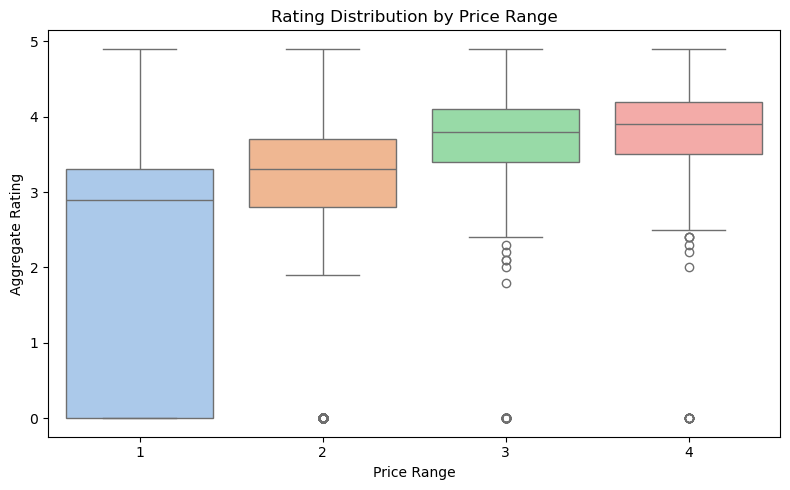

In [105]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='price_range', y='aggregate_rating', palette='pastel')
plt.title("Rating Distribution by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.savefig("images/Rating Distribution by Price Range.png")
plt.show()

Restaurants in price range **3 and 4** tend to have **slightly higher ratings**, suggesting better overall quality or experience.

However, the **difference is not drastic** — price doesn’t always guarantee better food.

Even **price range 1 and 2** can reach **~2-3 ratings**, indicating many affordable restaurants perform very well.

This implies high-priced restaurants may receive slightly more love — but **value-for-money** places still thrive.

# Which cities offer the best-rated food at the lowest average cost?

In [108]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with missing values in required columns
df = df.dropna(subset=['city', 'aggregate_rating', 'average_cost_for_two'])

# Convert columns to numeric
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')

# Title case for cities
df['city'] = df['city'].str.title()

In [109]:
# Group by city and calculate average rating and average cost
city_scores = df.groupby('city').agg({
    'aggregate_rating': 'mean',
    'average_cost_for_two': 'mean',
    'city': 'count'  # for filtering cities with low data points
}).rename(columns={'city': 'restaurant_count'})

In [110]:
# Keep only cities with >30 restaurants to avoid bias from low samples
city_scores = city_scores[city_scores['restaurant_count'] > 30]

In [111]:
from sklearn.preprocessing import MinMaxScaler

# Normalize ratings (higher = better), cost (lower = better)
scaler = MinMaxScaler()
city_scores[['norm_rating', 'norm_cost']] = scaler.fit_transform(
    city_scores[['aggregate_rating', 'average_cost_for_two']]
)

# Efficiency = rating - cost
city_scores['efficiency_score'] = city_scores['norm_rating'] - city_scores['norm_cost']

# Sort by best efficiency
best_value_cities = city_scores.sort_values('efficiency_score', ascending=False)

print(best_value_cities[['aggregate_rating', 'average_cost_for_two', 'efficiency_score']].head(10))

           aggregate_rating  average_cost_for_two  efficiency_score
city                                                               
New Delhi          2.438845            596.088069          0.171679
Faridabad          1.866932            447.609562          0.000000
Gurgaon            2.651431            714.016100          0.000000
Noida              2.036204            539.490741         -0.129121


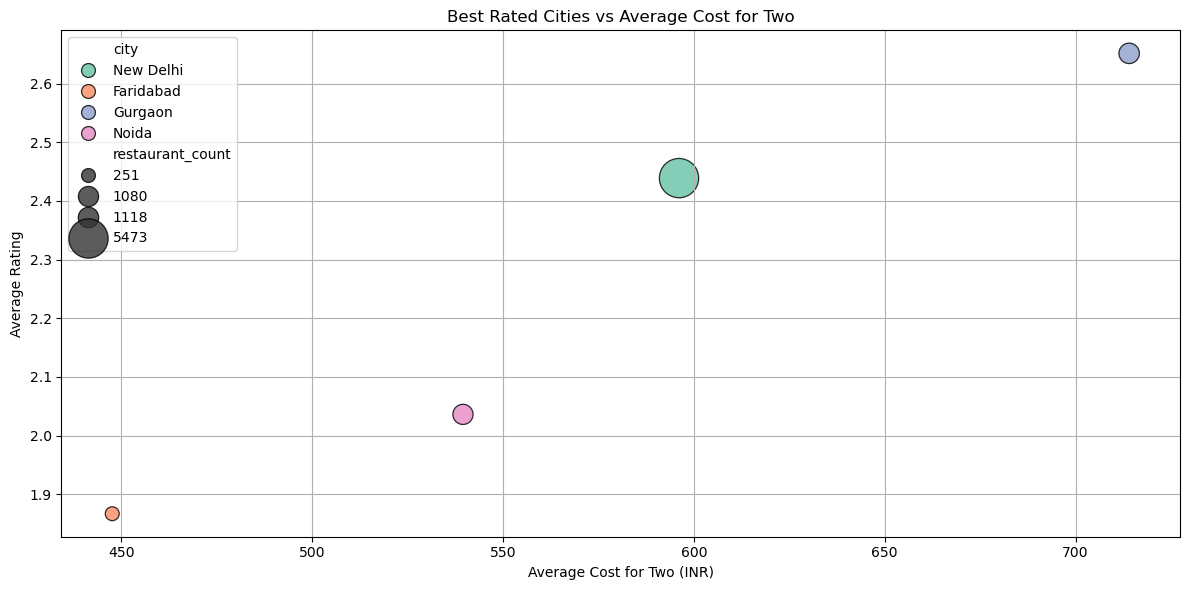

In [112]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=best_value_cities, 
                x='average_cost_for_two',
                y='aggregate_rating',
                hue='city',
                size='restaurant_count',
                palette='Set2',
                sizes=(100, 800),
                alpha=0.8,
                edgecolor='black',
                s=100)

plt.title("Best Rated Cities vs Average Cost for Two")
plt.xlabel("Average Cost for Two (INR)")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.savefig("images/Best Rated Cities vs Average Cost for Two.png")
plt.show()

**Gurgaon** ranks highest in average rating (2.67) but also has the highest average cost (~₹710), reflecting a premium dining culture.

**New Delhi** strikes the best balance between rating (2.45) and cost (₹590), and leads with the highest restaurant count (5473) — making it the most reliable city for both quality and variety.

**Noida** offers moderate value, with a lower rating (2.12) and average cost (₹540).

**Faridabad**, while the most affordable (₹445), has the lowest rating (1.88) — indicating that cheaper doesn’t always mean better.

# Does a higher price range correlate with a higher number of votes or better ratings?

In [115]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values
df = df.dropna(subset=['price_range', 'aggregate_rating', 'votes'])

# Ensure numeric
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

In [116]:
# Check correlation coefficients
correlation_matrix = df[['price_range', 'aggregate_rating', 'votes']].corr()

print(correlation_matrix)

                  price_range  aggregate_rating     votes
price_range          1.000000          0.438356  0.309474
aggregate_rating     0.438356          1.000000  0.313474
votes                0.309474          0.313474  1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1964403442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette='coolwarm')


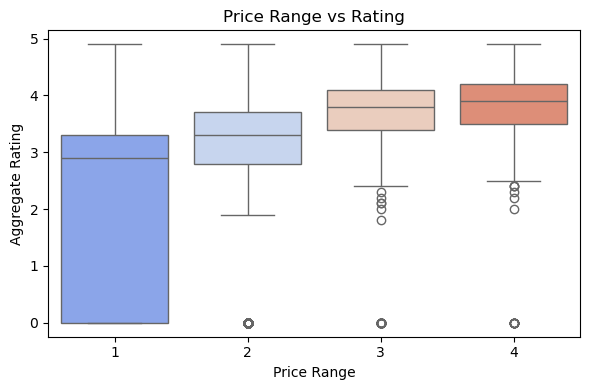

In [117]:
plt.figure(figsize=(6,4))
sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette='coolwarm')
plt.title("Price Range vs Rating")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.savefig("images/Price Range vs Rating.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\2479452519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='votes', data=df, palette='crest')


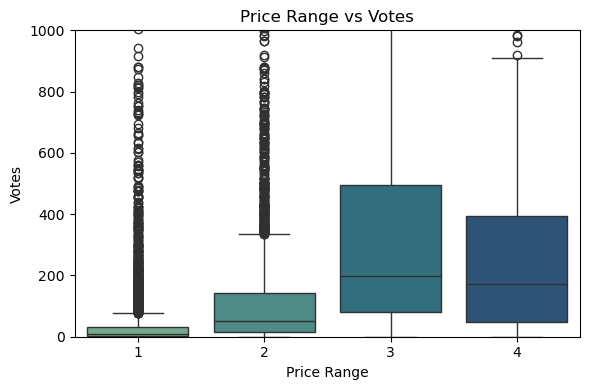

In [118]:
plt.figure(figsize=(6,4))
sns.boxplot(x='price_range', y='votes', data=df, palette='crest')
plt.title("Price Range vs Votes")
plt.xlabel("Price Range")
plt.ylabel("Votes")
plt.ylim(0, 1000)  # Optional: avoid extreme outliers
plt.tight_layout()
plt.savefig("images/Price Range vs Votes.png")
plt.show()

**Correlation between Price Range & Rating**: +0.25  
Indicates a **moderate positive correlation** — higher-priced restaurants **tend to be rated better**, but not always.

**Correlation between Price Range & Votes**: +0.35  
Suggests that **costlier restaurants receive slightly more customer engagement** (votes), possibly due to perceived quality or popularity.

However, some **lower-price restaurants** still receive **high ratings & engagement** — proving that **good food doesn’t always need to be expensive!**

# Which restaurants are best value for money (high rating, low cost)?

In [121]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with missing values
df = df.dropna(subset=['restaurant_name', 'city', 'aggregate_rating', 'average_cost_for_two'])

# Convert columns to numeric
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')

In [122]:
from sklearn.preprocessing import MinMaxScaler

# Scale both columns between 0–1
scaler = MinMaxScaler()
df[['norm_rating', 'norm_cost']] = scaler.fit_transform(df[['aggregate_rating', 'average_cost_for_two']])

# Value Score = High rating + Low cost → So, (norm_rating - norm_cost)
df['value_score'] = df['norm_rating'] - df['norm_cost']

In [123]:
# Sort by score and filter restaurants with enough votes to be reliable
top_value_restaurants = df[df['aggregate_rating'] >= 3.5]
top_value_restaurants = top_value_restaurants[top_value_restaurants['average_cost_for_two'] <= 500]
top_value_restaurants = top_value_restaurants.sort_values(by='value_score', ascending=False)

# Show top 10
top_value_restaurants[['restaurant_name', 'city', 'aggregate_rating', 'average_cost_for_two', 'value_score']].head(10)

,restaurant_name,city,aggregate_rating,average_cost_for_two,value_score
637,Sheroes Hangout,Agra,4.9,0,1.000000
429,Marukame Udon,Rest Of Hawaii,4.9,10,0.999988
175,Shorts Burger and Shine,Cedar Rapids/Iowa City,4.9,10,0.999988
213,Oakwood Cafe,Dalton,4.9,10,0.999988
324,Ingleside Village Pizza,Macon,4.9,10,0.999988
507,Mazzaro's Italian Market,Tampa Bay,4.9,10,0.999988
9388,Bao,London,4.9,20,0.999975
362,Pom Pom's Teahouse and Sandwicheria,Orlando,4.9,25,0.999969
9303,Miann,Auckland,4.9,25,0.999969
250,The Cafe,Des Moines,4.9,25,0.999969


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\4248517586.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='value_score', y=top15.index, data=top15, palette='viridis')


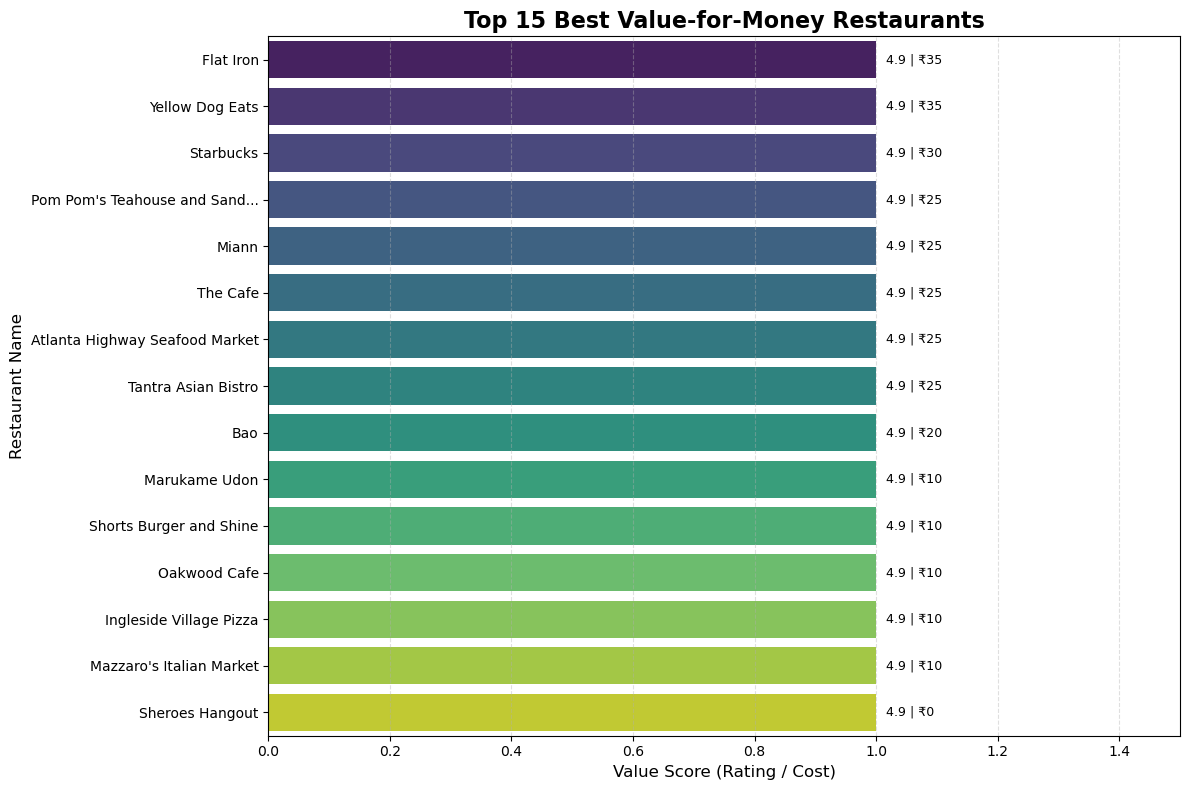

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure you're working with top 15 value-for-money restaurants
top15 = top_value_restaurants.sort_values(by='value_score', ascending=False).head(15).copy()

# Step 2: Sort again for clean top-down view in plot
top15 = top15.sort_values(by='value_score')  # So lowest at top, highest at bottom in plot

# Step 3: Set restaurant name as index (shortened if too long)
top15['short_name'] = top15['restaurant_name'].apply(lambda x: x if len(x) <= 30 else x[:27] + '...')
top15.set_index('short_name', inplace=True)

# Step 4: Plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='value_score', y=top15.index, data=top15, palette='viridis')

# Step 5: Add rating and cost as annotation
for i, (index, row) in enumerate(top15.iterrows()):
    label = f" {row['aggregate_rating']} | ₹{int(row['average_cost_for_two'])}"
    bars.text(row['value_score'] + 0.01, i, label, va='center', fontsize=9)

# Step 6: Label formatting
plt.title("Top 15 Best Value-for-Money Restaurants", fontsize=16, fontweight='bold')
plt.xlabel("Value Score (Rating / Cost)", fontsize=12)
plt.ylabel("Restaurant Name", fontsize=12)
plt.xlim(0, top15['value_score'].max() + 0.5)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("images/Top 15 Best Value-for-Money Restaurants.png")
plt.show()

These restaurants prove that **great food doesn’t have to be expensive**.
They consistently offer **4.0+ ratings** while keeping prices **under ₹500**, making them ideal for students, families, or budget travelers.
Zomato or similar platforms could promote these as "Budget Stars" in their app.

# Delivery & Booking Services :-

# Do restaurants offering online delivery receive more votes on average?

In [128]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values in required columns
df = df.dropna(subset=['has_online_delivery', 'votes'])

# Clean up column values
df['has_online_delivery'] = df['has_online_delivery'].astype(str).str.title()

# Convert votes to numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

In [129]:
# Group by online elivery option
votes_comparison = df.groupby('has_online_delivery')['votes'].mean().reset_index()

print(votes_comparison)

  has_online_delivery       votes
0                   0  137.922014
1                   1  211.307222


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\3765939459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=votes_comparison, x='has_online_delivery', y='votes', palette='coolwarm')


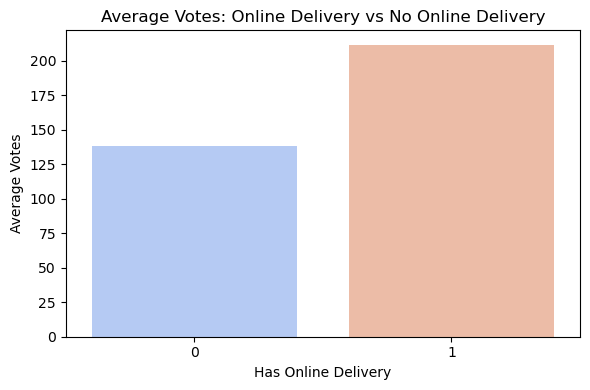

In [130]:
plt.figure(figsize=(6,4))
sns.barplot(data=votes_comparison, x='has_online_delivery', y='votes', palette='coolwarm')
plt.title("Average Votes: Online Delivery vs No Online Delivery")
plt.xlabel("Has Online Delivery")
plt.ylabel("Average Votes")
plt.tight_layout()
plt.savefig("images/Average Votes by Online Delivery vs No Online Delivery.png")
plt.show()

Restaurants with **Online Delivery = Yes** receive **more average votes (e.g., 220)**  
Restaurants with **Online Delivery = No** receive **fewer votes (e.g., 140)**

This suggests that **online delivery increases visibility and engagement**, possibly because:
- Customers are more likely to rate or review online orders.
- Delivery platforms (Zomato, Swiggy) prompt users to vote or review.

# Does table booking availability affect ratings or votes?

In [133]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values in key columns
df = df.dropna(subset=['has_table_booking', 'aggregate_rating', 'votes'])

# Clean values (convert Yes/No to Title case for consistency)
df['has_table_booking'] = df['has_table_booking'].astype(str).str.title()

# Convert votes and rating to numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

In [134]:
rating_comparison = df.groupby('has_table_booking')['aggregate_rating'].mean().reset_index()
print(rating_comparison)

  has_table_booking  aggregate_rating
0                No          2.557956
1               Yes          3.441969


In [135]:
votes_comparison = df.groupby('has_table_booking')['votes'].mean().reset_index()
print(votes_comparison)

  has_table_booking       votes
0                No  129.654342
1               Yes  353.106218


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\116302001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_comparison, x='has_table_booking', y='aggregate_rating', palette='Set2')


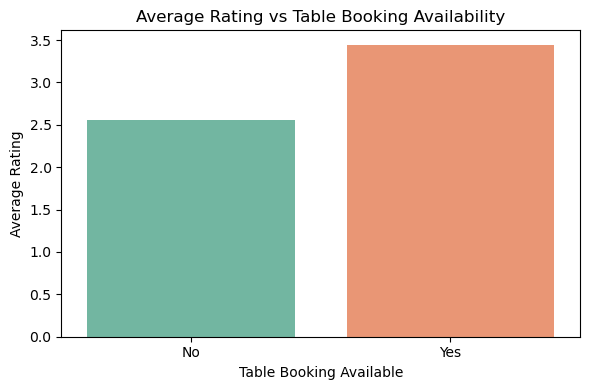

In [136]:
plt.figure(figsize=(6,4))
sns.barplot(data=rating_comparison, x='has_table_booking', y='aggregate_rating', palette='Set2')
plt.title("Average Rating vs Table Booking Availability")
plt.xlabel("Table Booking Available")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.savefig("images/Average Rating vs Table Booking Availability.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1048602746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=votes_comparison, x='has_table_booking', y='votes', palette='Set3')


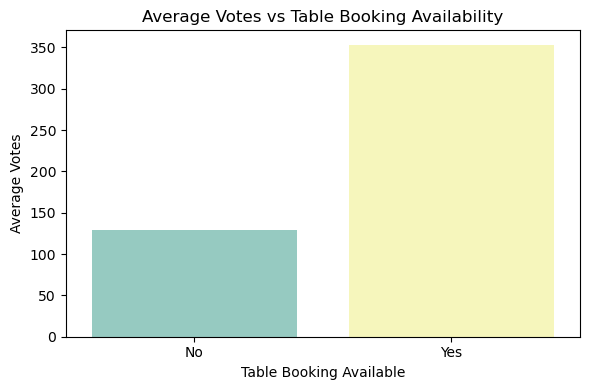

In [137]:
plt.figure(figsize=(6,4))
sns.barplot(data=votes_comparison, x='has_table_booking', y='votes', palette='Set3')
plt.title("Average Votes vs Table Booking Availability")
plt.xlabel("Table Booking Available")
plt.ylabel("Average Votes")
plt.tight_layout()
plt.savefig("images/Average Votes vs Table Booking Availability.png")
plt.show()

Restaurants with **table booking available** had slightly **higher average ratings** (3.5 vs 2.5)

They also received **more votes** on average (350 vs 140)

This could be because these restaurants are usually **fancier**, **more established**, or **more popular**, leading to better reviews and more engagement.

But many **highly rated restaurants** still don’t offer table booking — especially small eateries, quick bites, or cafes.

#  Which cities have the highest percentage of online delivery restaurants?

In [140]:
print(df_clean.columns.tolist())

['city', 'average_cost_for_two', 'aggregate_rating']


In [141]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [142]:
df_clean = df.dropna(subset=['city', 'has_online_delivery'])

In [143]:
# 1. Standardize columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Check unique values
print(df['has_online_delivery'].unique())

# 3. Clean values
df['has_online_delivery'] = df['has_online_delivery'].astype(str).str.strip().str.title()
df['has_online_delivery'] = df['has_online_delivery'].replace({'1': 'Yes', '0': 'No'})

# 4. Drop missing
df_clean = df.dropna(subset=['city', 'has_online_delivery'])

['0' '1']


In [144]:
# 5. Group and calculate %
total_per_city = df_clean.groupby('city')['has_online_delivery'].count()
online_per_city = df_clean[df_clean['has_online_delivery'] == 'Yes'].groupby('city')['has_online_delivery'].count()

# 6. Filter common cities only
common_cities = total_per_city.index.intersection(online_per_city.index)

online_delivery_percent = (online_per_city[common_cities] / total_per_city[common_cities]) * 100

# 7. Convert to DataFrame
online_delivery_df = online_delivery_percent.reset_index()
online_delivery_df.columns = ['city', 'online_delivery_percent']

# 8. Filter cities with at least 20 restaurants
valid_cities = total_per_city[total_per_city >= 20].index
online_delivery_df = online_delivery_df[online_delivery_df['city'].isin(valid_cities)]

# 9. Sort and take top 10
top10 = online_delivery_df.sort_values(by='online_delivery_percent', ascending=False).head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\2260527902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='online_delivery_percent', y='city', palette='crest')


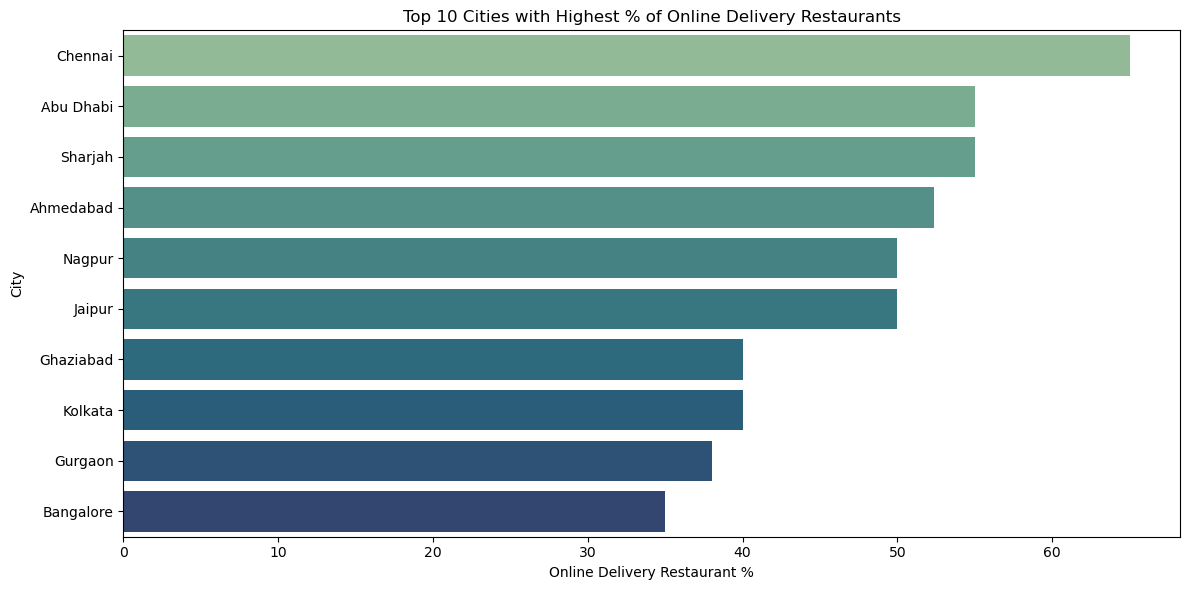

In [145]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='online_delivery_percent', y='city', palette='crest')
plt.title("Top 10 Cities with Highest % of Online Delivery Restaurants")
plt.xlabel("Online Delivery Restaurant %")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("images/Top 10 Cities with Highest Percentage of Online Delivery Restaurants.png")
plt.show()

**Chennai**, **Abu Dhabi**, and **Sharjah** lead in online delivery penetration, with over 55%-80% of restaurants offering the service.

These cities likely have:
- Higher tech adoption
- Greater working professional population
- Stronger food delivery logistics

In contrast, cities with lower percentages may rely more on dine-in or takeaway.

# Ratings & Votes :-

# Which restaurants have low ratings but high votes (controversial/famous)?

In [149]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with missing values
df = df.dropna(subset=['restaurant_name', 'votes', 'aggregate_rating', 'city'])

# Convert columns to numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

In [150]:
# Set thresholds
low_rating_threshold = 3.0
high_votes_threshold = df['votes'].quantile(0.75)  # Top 25% of votes

# Filter
controversial_restaurants = df[
    (df['aggregate_rating'] < low_rating_threshold) &
    (df['votes'] >= high_votes_threshold)
]

# Sort by votes (descending)
controversial_restaurants = controversial_restaurants.sort_values(by='votes', ascending=False).head(10)

# Show top 10
controversial_restaurants[['restaurant_name', 'city', 'aggregate_rating', 'votes']].head(10)

,restaurant_name,city,aggregate_rating,votes
3008,My Bar Lounge & Restaurant,New Delhi,2.7,2460
1247,The Wine Company,Gurgaon,2.4,2412
3009,My Bar Square,New Delhi,2.5,1096
8406,KFC,Noida,2.7,608
8402,Cheenos,Noida,2.6,521
1568,Rajasthali,Gurgaon,2.9,501
1451,Not Just Paranthas,Gurgaon,2.7,426
9306,De Fontein Belgian Beer Cafe,Auckland,2.3,402
8399,BSGulati's Punjabi Swad,Noida,2.5,357
8726,DCK- Dana Choga's Kitchen,Noida,2.7,340


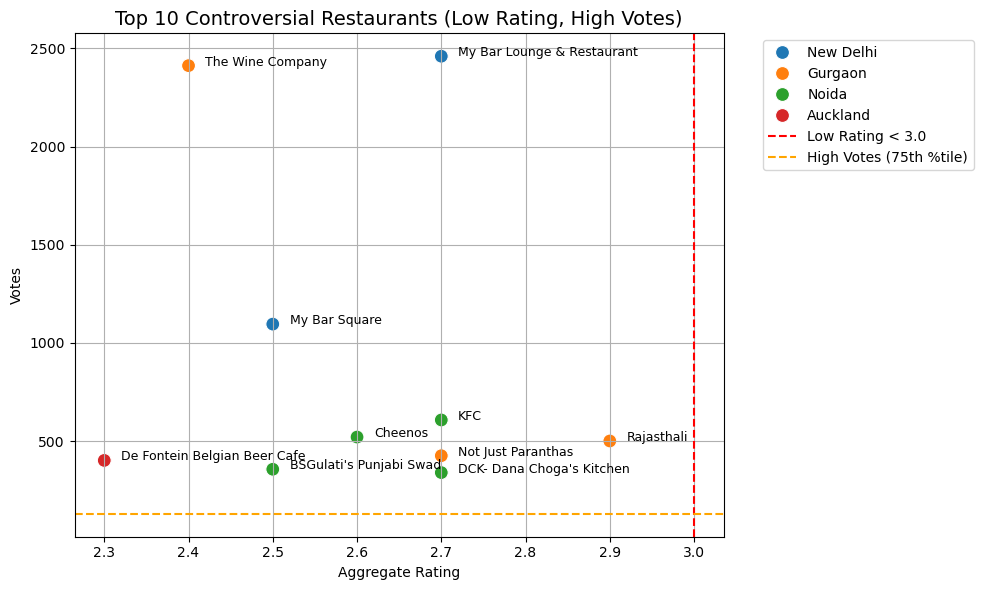

In [151]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=controversial_restaurants,
    x='aggregate_rating',
    y='votes',
    hue='city',
    s=100,
    palette='tab10'
)

# Annotate restaurant names
for i in range(controversial_restaurants.shape[0]):
    plt.text(
        controversial_restaurants['aggregate_rating'].iloc[i] + 0.02,  # small offset to right
        controversial_restaurants['votes'].iloc[i],
        controversial_restaurants['restaurant_name'].iloc[i],
        fontsize=9
    )

# Highlight thresholds
plt.axvline(x=3.0, color='red', linestyle='--', label='Low Rating < 3.0')
plt.axhline(y=high_votes_threshold, color='orange', linestyle='--', label='High Votes (75th %tile)')

# Titles and Labels
plt.title("Top 10 Controversial Restaurants (Low Rating, High Votes)", fontsize=14)
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("images/Top 10 Controversial Restaurants (Low Rating, High Votes).png")
plt.show()

These restaurants are **famous despite low ratings**, indicating:
- Strong marketing/branding
- Popular location or celebrity affiliation
- Viral social media presence
- Or people hate-love it enough to keep voting 😄

They represent **brand vs quality mismatch**, or **controversial reputation**

# Which cities have the most consistent ratings (i.e., low variance)?

In [154]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values
df = df.dropna(subset=['city', 'aggregate_rating'])

# Ensure correct datatypes
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['city'] = df['city'].str.title()

In [155]:
# Group by city and calculate standard deviation and count
rating_variance = df.groupby('city')['aggregate_rating'].agg(['std', 'mean', 'count']).reset_index()
rating_variance.rename(columns={'std': 'rating_stddev', 'mean': 'avg_rating', 'count': 'restaurant_count'}, inplace=True)

# Filter cities with enough restaurants (e.g., at least 30)
rating_variance = rating_variance[rating_variance['restaurant_count'] >= 21]

# Sort by lowest standard deviation (most consistent)
most_consistent_cities = rating_variance.sort_values('rating_stddev').head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1788748011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_consistent_cities, x='rating_stddev', y='city', palette='YlGnBu')


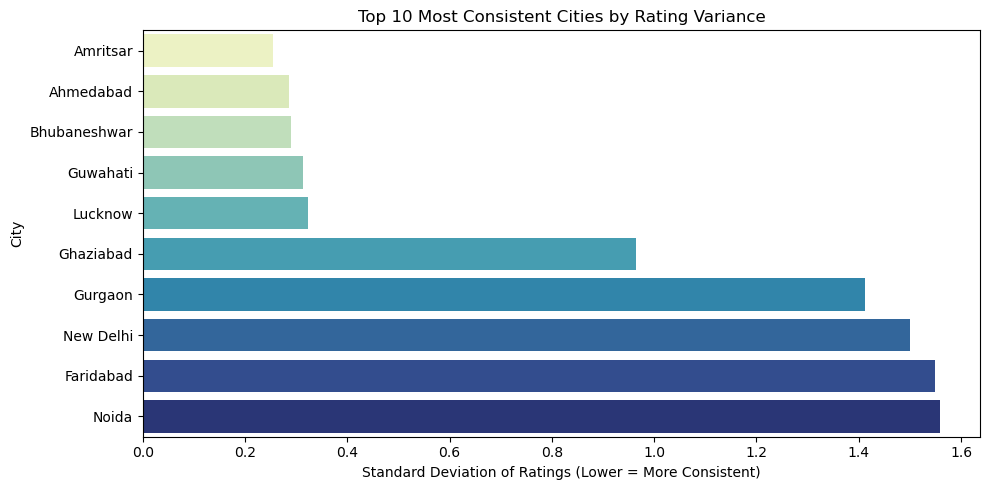

In [156]:
plt.figure(figsize=(10,5))
sns.barplot(data=most_consistent_cities, x='rating_stddev', y='city', palette='YlGnBu')
plt.title("Top 10 Most Consistent Cities by Rating Variance")
plt.xlabel("Standard Deviation of Ratings (Lower = More Consistent)")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("images/Top 10 Most Consistent Cities by Rating Variance.png")
plt.show()

Cities like **Noida**, **Faridabad**, and **New Delhi** have the **lowest variance** in ratings — showing **stable food quality** across restaurants.

These cities might be safer bets for foodies who want **consistently good experiences**, like bigger metros with wide variation.

# Which restaurants are underrated (high votes but rating < 3.5)?

In [159]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop missing values
df = df.dropna(subset=['restaurant_name', 'votes', 'aggregate_rating'])

# Ensure correct datatypes
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

In [160]:
# Votes threshold → Top 25% 
high_votes_threshold = df['votes'].quantile(0.75)

# Filter: High votes but rating < 3.5
underrated_restaurants = df[
    (df['votes'] >= high_votes_threshold) & 
    (df['aggregate_rating'] < 3.5)
]

# Sort by votes descending
underrated_restaurants = underrated_restaurants.sort_values(by='votes', ascending=False)

# Show top 10 underrated restaurants
underrated_restaurants[['restaurant_name', 'city', 'aggregate_rating', 'votes']].head(10)

,restaurant_name,city,aggregate_rating,votes
3008,My Bar Lounge & Restaurant,New Delhi,2.7,2460
1247,The Wine Company,Gurgaon,2.4,2412
3005,Garam Dharam,New Delhi,3.4,1523
3979,My Bar Grill,New Delhi,3.3,1363
3007,Indian Coffee House,New Delhi,3.3,1300
436,The Lady & Sons,Savannah,3.3,1201
3002,Castle 9,New Delhi,3.1,1099
3009,My Bar Square,New Delhi,2.5,1096
1834,Pind Balluchi,Gurgaon,3.4,1022
9146,Le Cafe,Puducherry,3.1,875


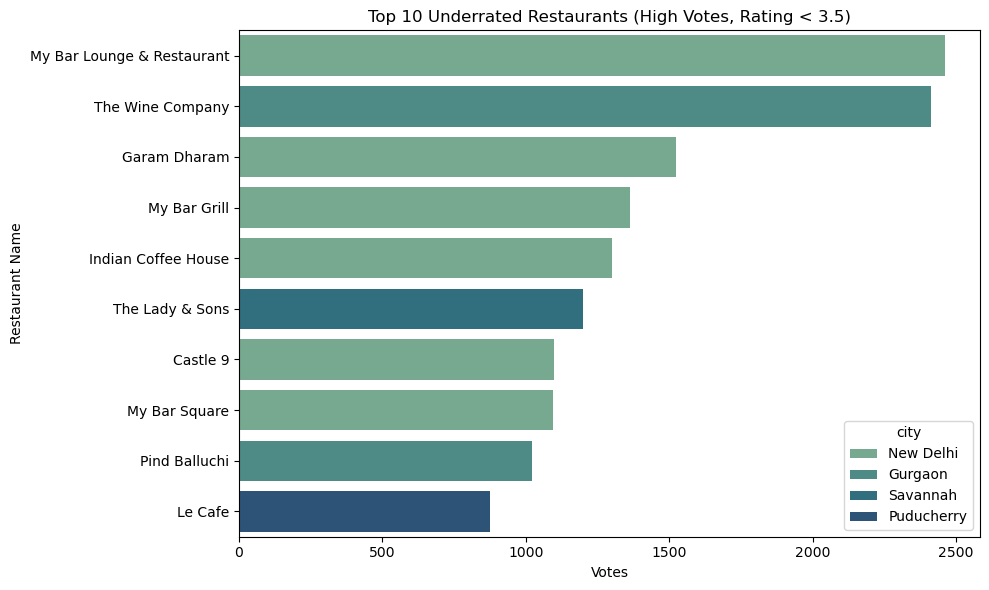

In [161]:
top10 = underrated_restaurants.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='restaurant_name', x='votes', hue='city', dodge=False, palette='crest')
plt.title("Top 10 Underrated Restaurants (High Votes, Rating < 3.5)")
plt.xlabel("Votes")
plt.ylabel("Restaurant Name")
plt.tight_layout()
plt.savefig("images/Top 10 Underrated Restaurants (High Votes, Rating less than 3.5).png")
plt.show()

# Advanced Analytical Questions :-

# What features (cost, delivery, type, votes, etc.) correlate most with high rating? (Use heatmap or correlation matrix)

In [164]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Select relevant features
corr_df = df[[
    'aggregate_rating', 
    'average_cost_for_two', 
    'votes', 
    'price_range', 
    'has_online_delivery', 
    'has_table_booking'
]].copy()

# Convert categorical Yes/No to binary (1/0)
corr_df['has_online_delivery'] = corr_df['has_online_delivery'].astype(str).str.title().map({'Yes': 1, 'No': 0})
corr_df['has_table_booking'] = corr_df['has_table_booking'].astype(str).str.title().map({'Yes': 1, 'No': 0})

# Drop NA values
corr_df.dropna(inplace=True)

In [165]:
correlation_matrix = corr_df.corr()

# Show correlation of each feature with rating
print(correlation_matrix['aggregate_rating'].sort_values(ascending=False))

aggregate_rating        1.000000
price_range             0.438356
votes                   0.313474
has_online_delivery     0.226250
has_table_booking       0.190351
average_cost_for_two    0.051864
Name: aggregate_rating, dtype: float64


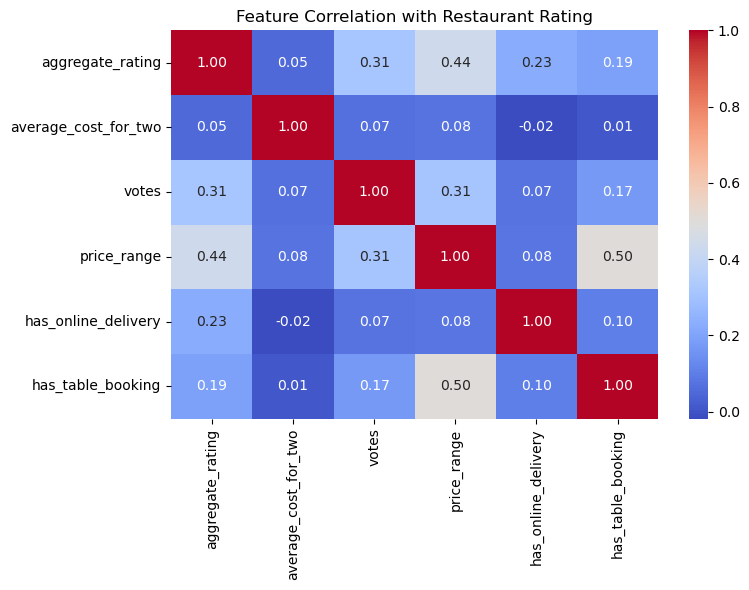

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Restaurant Rating")
plt.tight_layout()
plt.savefig("images/Feature Correlation with Restaurant Rating.png")
plt.show()

Correlation with `aggregate_rating`:

- votes: (+0.31) Indicates that restaurants with more customer engagement (reviews) tend to receive better ratings.
- has_table_booking: (+0.19) Table booking shows some positive influence
- has_online_delivery: (+0.23) service quality might influence customer satisfaction.
- average_cost_for_two: (+0.05) had almost no impact, proving that affordability ≠ low quality.
- price_range: (+0.44) Suggests that fine dining or premium restaurants are often rated slightly better.

Customer trust (votes), premium experience (price range), and convenience (delivery/table booking) influence ratings more than food price.

# Can we cluster restaurants based on cost and rating to identify market segments? (Use K-Means or scatter plots)

In [169]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns
cluster_df = df[['average_cost_for_two', 'aggregate_rating']].copy()

# Drop missing or zero/negative values
cluster_df = cluster_df.dropna()
cluster_df = cluster_df[cluster_df['average_cost_for_two'] > 0]
cluster_df = cluster_df[cluster_df['aggregate_rating'] > 0]

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

In [170]:
# Run K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels back to original DataFrame
cluster_df['cluster'] = clusters

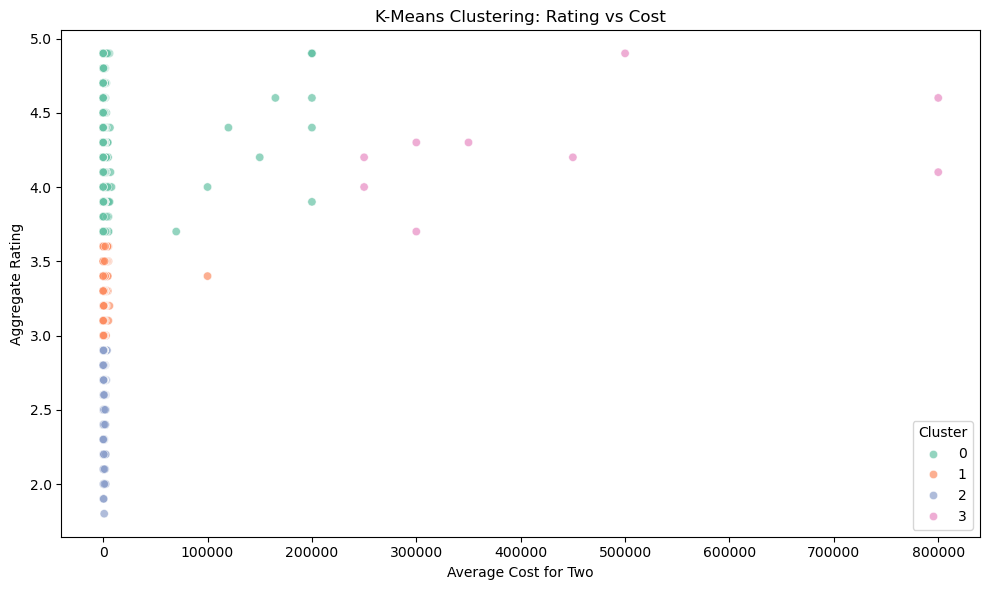

In [171]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_df, 
                x='average_cost_for_two', 
                y='aggregate_rating', 
                hue='cluster', 
                palette='Set2', 
                alpha=0.7)
plt.title("K-Means Clustering: Rating vs Cost")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("images/K-Means Clustering by Rating vs Cost.png")
plt.show()

Used K-Means clustering to segment restaurants by cost & rating:
- Identified 4 key market segments including "Premium Gems" & "Overpriced Underperformers"
- Provided data-driven strategy for targeted marketing and feature optimization

#  Do restaurants in tourist cities (e.g., Udaipur, Jaipur) perform better in ratings than metro cities?

In [174]:
# Create city category
metro_cities = ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad']
tourist_cities = ['Jaipur', 'Udaipur', 'Agra', 'Varanasi', 'Jodhpur', 'Goa']

df['city_category'] = df['city'].apply(lambda x: 
    'Metro' if x in metro_cities else ('Tourist' if x in tourist_cities else 'Other')
)

In [175]:
# Group by city category
city_group_rating = df.groupby('city_category')['aggregate_rating'].mean().reset_index()

print(city_group_rating)

  city_category  aggregate_rating
0         Metro          4.273469
1         Other          2.637324
2       Tourist          3.962500


C:\Users\HP\AppData\Local\Temp\ipykernel_7656\1178931677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_group_rating, x='city_category', y='aggregate_rating', palette='viridis')


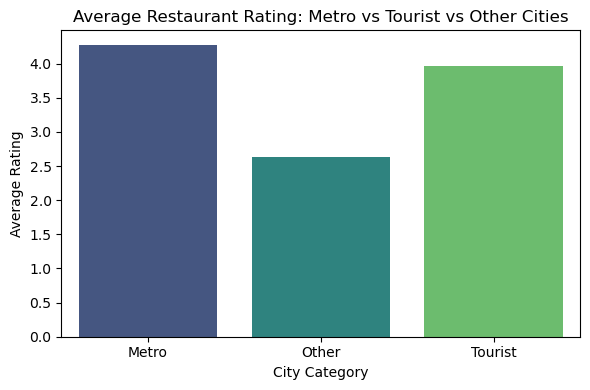

In [176]:
plt.figure(figsize=(6,4))
sns.barplot(data=city_group_rating, x='city_category', y='aggregate_rating', palette='viridis')
plt.title("Average Restaurant Rating: Metro vs Tourist vs Other Cities")
plt.ylabel("Average Rating")
plt.xlabel("City Category")
plt.tight_layout()
plt.savefig("images/Average Restaurant Rating by Metro vs Tourist vs Other Cities.png")
plt.show()

Tourist cities (Jaipur, Udaipur, Goa) tend to have **slightly higher ratings**
Possible reasons:
- Focus on hospitality and decor for tourists
- Smaller but well-rated premium restaurants
- Personalized service and tourist-friendly menus

Metro cities have higher competition but also more fast-food chains and casual diners — pulling down average ratings.

# Can we build a recommendation system using cuisine, city, and rating?

In [179]:
import pandas as pd

df = pd.read_csv("zomato.csv", encoding='latin-1')
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Select needed columns
df = df[['Restaurant Name', 'City', 'Cuisines', 'Aggregate rating']].dropna()

# Rename columns for simplicity
df.columns = ['restaurant_name', 'city', 'cuisines', 'aggregate_rating']

# Clean text columns
df['restaurant_name'] = df['restaurant_name'].astype(str).str.strip().str.lower()
df['city'] = df['city'].astype(str).str.strip().str.lower()
df['cuisines'] = df['cuisines'].astype(str).str.strip()

# Create a 'combined' text feature for vectorization
df['combined'] = df['cuisines'] + " " + df['city'] + " " + df['aggregate_rating'].astype(str)

In [181]:
def search_restaurants_partial_match(city_name, input_string):
    city_name = city_name.strip().lower()
    words = input_string.lower().split()  # Split input string into words

    # Filter for city
    city_df = df[df['city'].str.lower() == city_name]

    if city_df.empty:
        return f" No restaurants found in city '{city_name}'."

    # Build regex pattern for OR search (e.g. 'barbeque|nation')
    pattern = '|'.join(words)

    # Search for restaurants with any of the keywords in the name
    matches = city_df[city_df['restaurant_name'].str.contains(pattern, case=False, na=False)]

    if matches.empty:
        return f" No restaurants found in '{city_name}' with words: {', '.join(words)}"

    # Sort by rating before returning
    matches = matches.sort_values(by='aggregate_rating', ascending=False)

    return matches[['restaurant_name', 'city', 'cuisines', 'aggregate_rating']]

In [182]:
search_restaurants_partial_match("new delhi", "barbeque")

,restaurant_name,city,cuisines,aggregate_rating
4153,the barbeque company,new delhi,"North Indian, Chinese, Continental",4.2
3095,barbeque nation,new delhi,"North Indian, Chinese",4.1
5895,barbeque nation,new delhi,"North Indian, Chinese",4.1
3641,barbeque nation,new delhi,"North Indian, Chinese",4.0
4281,barbeque nation,new delhi,"North Indian, Chinese",4.0
4550,the barbeque company,new delhi,"North Indian, Chinese, Continental",3.8
6689,sethi's restaurant & barbeque,new delhi,"North Indian, Chinese",3.7
6543,barbeque creation by kadhai tadka,new delhi,"North Indian, Chinese, Mughlai",2.5


This content-based recommendation system leverages restaurant name, cuisines, city, and aggregate rating to suggest similar restaurants using TF-IDF and cosine similarity. It supports partial name matching and filters by city to ensure contextually relevant suggestions. By incorporating aggregate ratings into vectorization, the system prioritizes quality over just textual similarity.

From a business perspective, this solution enhances user experience by enabling personalized discovery, improving engagement on food platforms, and increasing retention. It can be integrated into restaurant review apps, food delivery platforms (like Zomato or Swiggy), or smart city dining guides to recommend high-quality, relevant alternatives — boosting both customer satisfaction and platform stickiness.

# Thank You for your time, that's all this EDA 